# Forest Cover Type Prediction

## Descripción

El área de estudio incluye cuatro áreas silvestres situadas en el Bosque Nacional Roosevelt del norte de Colorado. Cada observación es un parche de 30m x 30m. Se le pide que prediga una clasificación entera para el tipo de cubierta forestal. Los siete tipos son:

    1 - Abeto rojo/abeto
    2 - Pino Lodgepole
    3 - Pino Ponderosa
    4 - Cottonwood/Willow
    5 - Aspen
    6 - Abeto de Douglas
    7 - Krummholz

El conjunto de entrenamiento (15120 observaciones) contiene ambas características y el Cover_Type. El conjunto de pruebas contiene sólo las características. Debe predecir el Cover_Type para cada fila del conjunto de test (565892 observaciones).

Campos de datos

    Elevación - Elevación en metros
    Aspecto - Aspecto en grados de azimut
    Pendiente - Pendiente en grados
    Distancia_Horz Dist a las características más cercanas de las aguas superficiales
    Distancia_vertical_a_hidrología - Vert Dist a las características más cercanas de las aguas superficiales
    Distancia horizontal a las carreteras - Horz Dist a la carretera más cercana
    Hillshade_9am (0 to 255 index) - Índice de Hillshade a las 9am, solsticio de verano
    Hillshade_Mediodía (0 a 255 índice) - Índice de Hillshade al mediodía, solsticio de verano
    Hillshade_3pm (0 a 255 índice) - Índice de Hillshade a las 3pm, solsticio de verano
    Distancia horizontal a los puntos de fuego - Horz Dist a los puntos de ignición más cercanos.
    Wilderness_Area (4 columnas binarias, 0 = ausencia o 1 = presencia) - Designación del área silvestre
    Tipo_de_suelo (40 columnas binarias, 0 = ausencia o 1 = presencia) - Designación del tipo de suelo
    Cover_Type (7 tipos, números enteros 1 a 7) - Cubierta forestal Designación del tipo

Las áreas silvestres son:

    1 - Zona silvestre de Rawah
    2 - Área silvestre de Neota
    3 - Área silvestre del Pico Comanche
    4 - Área silvestre de Cache la Poudre

Los tipos de suelo son:

    1 familia de catedrales - Complejo de afloramiento de rocas, extremadamente pedregoso.
    2 Vanet - Complejo de familias de ratones, muy pedregoso.
    3 Haploborolis - Complejo de afloramiento de rocas, muy pedregoso.
    4 Familia de las ratas - Complejo de afloramiento de rocas, de escombros.
    5 Familia Vanet - Complejo de afloramiento de rocas, rocoso.
    6 Vanet - Familia Wetmore - Complejo de afloramiento de rocas, rocoso.
    7 Familia gótica.
    8 Supervisor - Complejo de familias Limber, rocoso.
    9 Familia Troutville, muy pedregosa.
    10 Bullwark - Familias Catamount - Complejo de afloramiento de rocas, de escombros.
    11 Bullwark - Familias Catamount - Complejo de tierra rocosa, escombros.
    12 Familia Legault - Complejo de rocas, pedregoso.
    13 Familia Catamount - Terreno rocoso - Complejo de la familia Bullwark, escombros.
    14 Pachic Argiborolis - Complejo de Aquolis.
    15 no especificado en el estudio de suelos y ELU del USFS.
    16 Cryaquolis - Complejo de Cryoborolis.
    17 Familia Gateview - Complejo Cryaquolis.
    18 Familia Rogert, muy pedregosa.
    19 Típico de Cryaquolis - Complejo Borohemista.
    20 Típico de los Criaqueptos - Complejo típico de los Criaquolls.
    21 Típico de los Cryaquolls - familia Leighcan, complejo de till substratum.
    22 Familia Leighcan, hasta el sustrato, extremadamente pedregoso.
    23 Familia Leighcan, hasta el sustrato - Complejo típico de los criacuellos.
    24 Familia Leighcan, extremadamente pedregosa.
    25 Familia Leighcan, cálida, extremadamente pedregosa.
    26 Granile - Complejo de las familias Catamount, muy pedregoso.
    27 Familia Leighcan, cálida - Complejo de afloramiento de rocas, extremadamente pedregoso.
    28 Familia Leighcan - Complejo de afloramiento de rocas, extremadamente pedregoso.
    29 Como - Complejo de familias de Legault, extremadamente pedregoso.
    30 Familia Como - Terreno rocoso - Complejo familiar de Legault, extremadamente pedregoso.
    31 Leighcan - Complejo de familias de la Catamount, extremadamente pedregoso.
    32 Familia Catamount - Afloramiento de rocas - Complejo familiar de Leighcan, extremadamente pedregoso.
    33 Leighcan - Familias de las Catamonias - Complejo de afloramiento de rocas, extremadamente pedregoso.
    34 Cryorthents - Complejo rocoso, extremadamente pedregoso.
    35 Cryumbrepts - Complejo de afloramiento de rocas - Complejo de Cryaquepts.
    36 Familia Bross - Terreno rocoso - Complejo de criptas, extremadamente pedregoso.
    37 Afloramiento de rocas - Cripuertos - Complejo de Cryorthents, extremadamente pedregoso.
    38 Leighcan - Familia Moran - Complejo de criocuencas, extremadamente pedregoso.
    39 Familia Moran - Cryorthents - Complejo de la familia Leighcan, extremadamente pedregoso.
    40 Familia Moran - Cryorthents - Complejo rocoso, extremadamente pedregoso.

---

### Paquetes a importar

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

### Carga de datos del problema

In [3]:
#Eliminación del id ya que no aporta nada
df_train = pd.read_csv('./train.csv').drop(columns='Id')
df_test = pd.read_csv('./test.csv').drop(columns='Id')
df_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


Numero de variables del train: 55
Numero de instancias del train: 15120
Clase a predecir: [1 2 3 4 5 6 7]


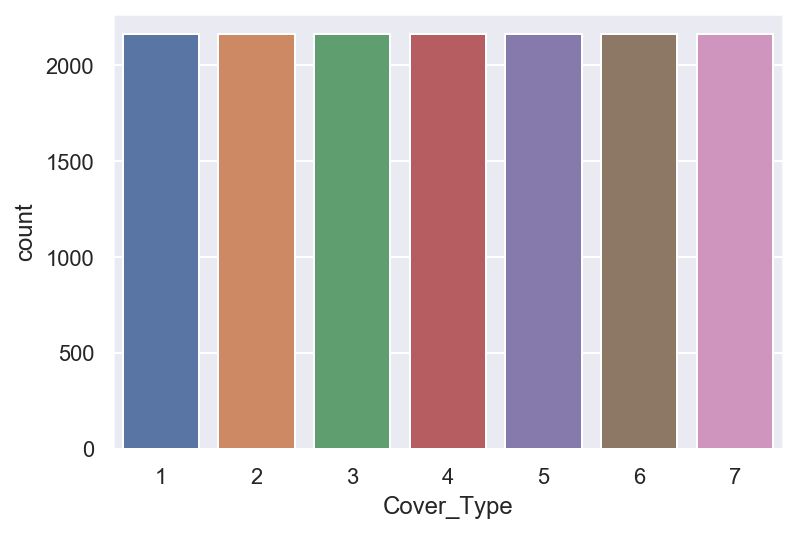

In [4]:
print('Numero de variables del train: {}'.format(df_train.shape[1]))
print('Numero de instancias del train: {}'.format(df_train.shape[0]))
print('Clase a predecir: {}'.format(np.sort(df_train['Cover_Type'].unique())))
sns.countplot(x='Cover_Type', data=df_train);

In [42]:
df_train[df_train.columns[:-1]].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
#Tipos de datos
#df_train.dtypes # Son todos de tipo int64

In [24]:
#Comprobación de nulos
#np.sum(df_train.isna()) # No presenta nulos o valores perdidos

In [26]:
columns = df_train.columns[:5].tolist()
columns.append('Cover_Type')

/Users/cristian/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/cristian/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


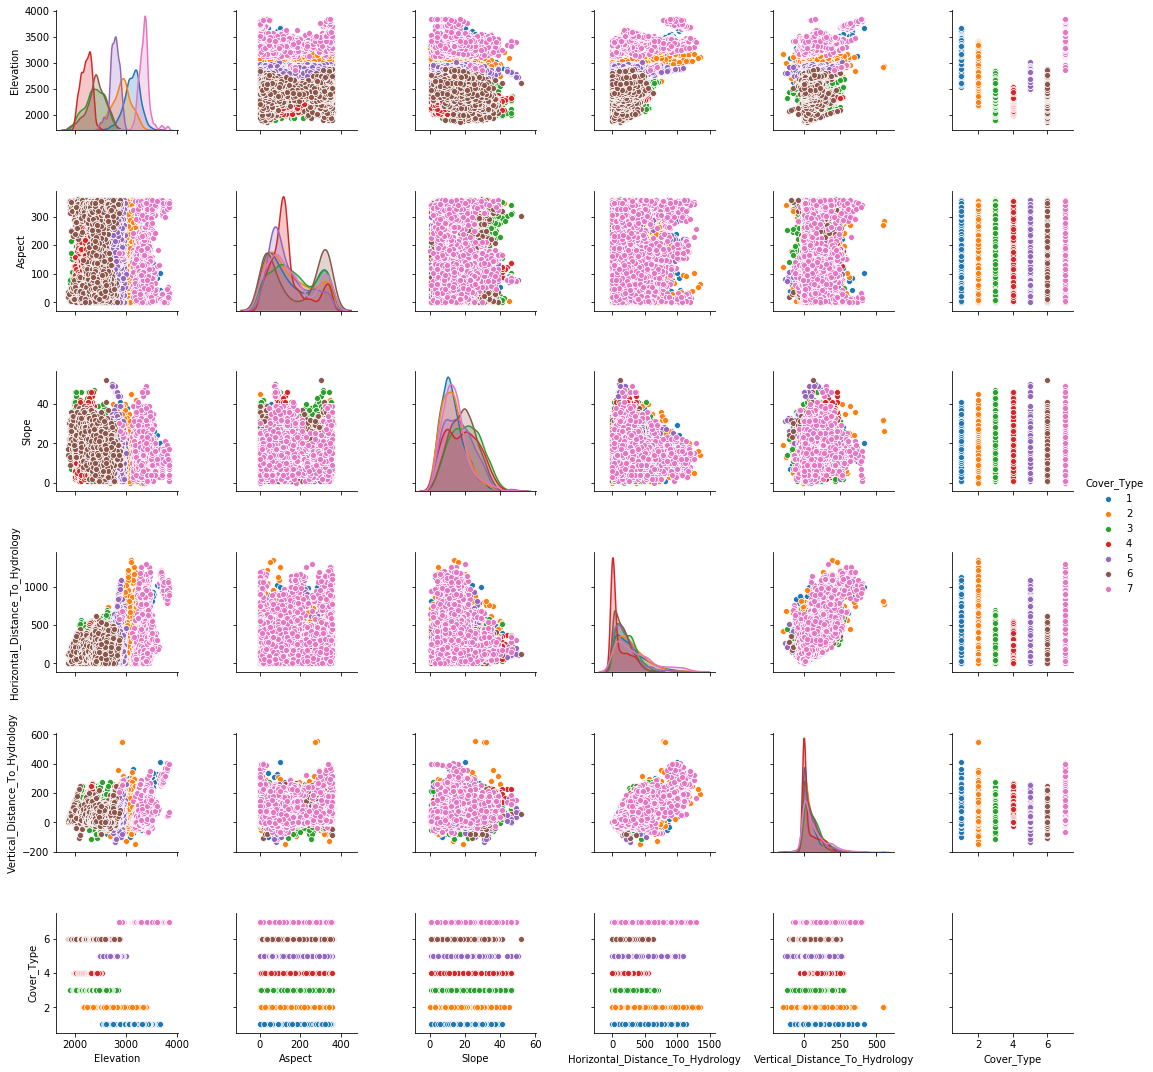

In [22]:
sns.pairplot(df_train[columns], hue="Cover_Type");

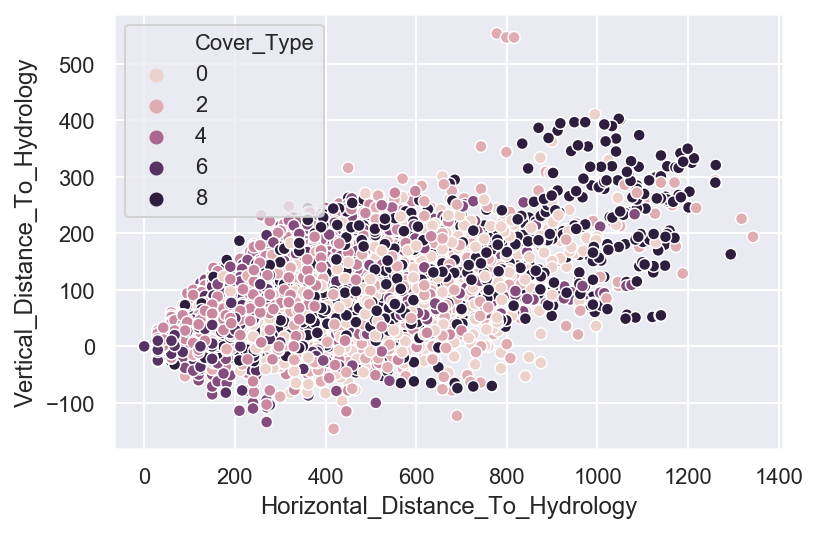

In [9]:
sns.scatterplot(x='Horizontal_Distance_To_Hydrology', y='Vertical_Distance_To_Hydrology', data=df_train, hue='Cover_Type');

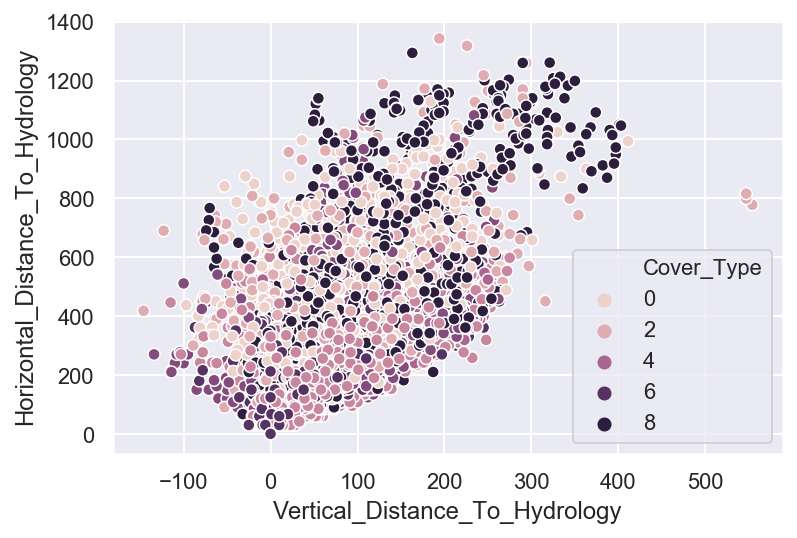

In [10]:
sns.scatterplot(x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology', data=df_train, hue='Cover_Type');

Aunque a priori las gráficas parezcan distintas, se trata de la misma gráfica pero desde distinta perspectiva en función de los ejes y de las variables ya que la escala es distinta

### Continuar con el análisis

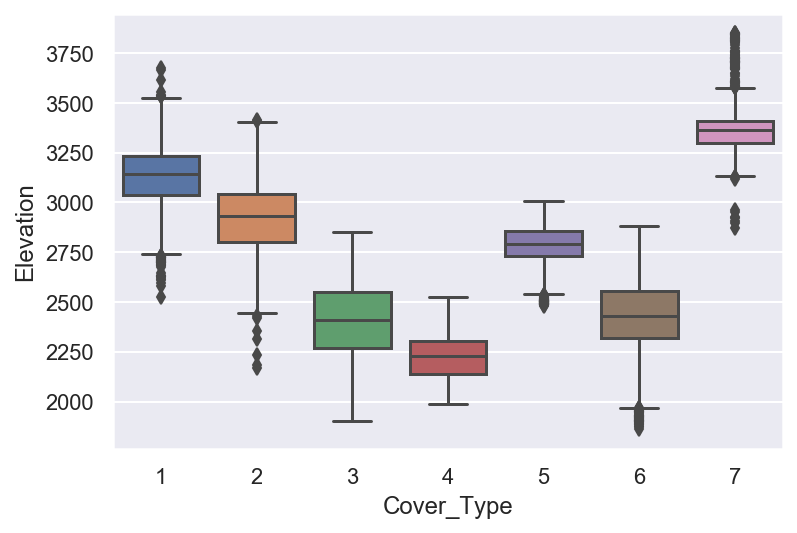

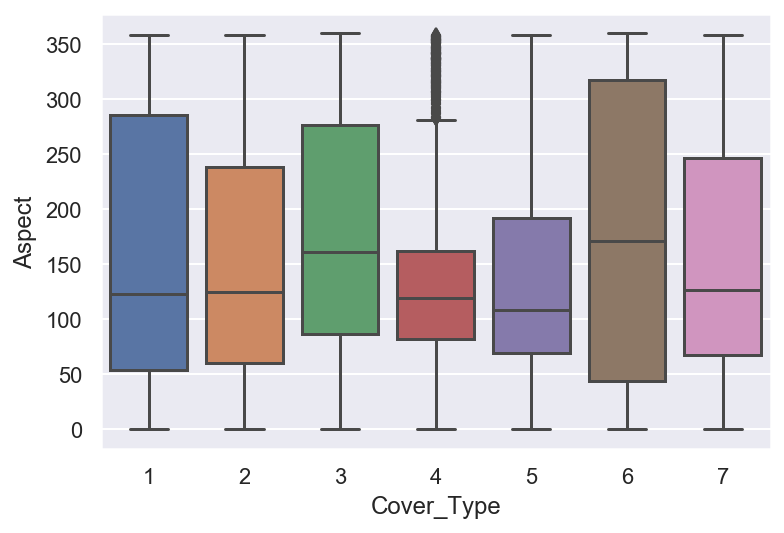

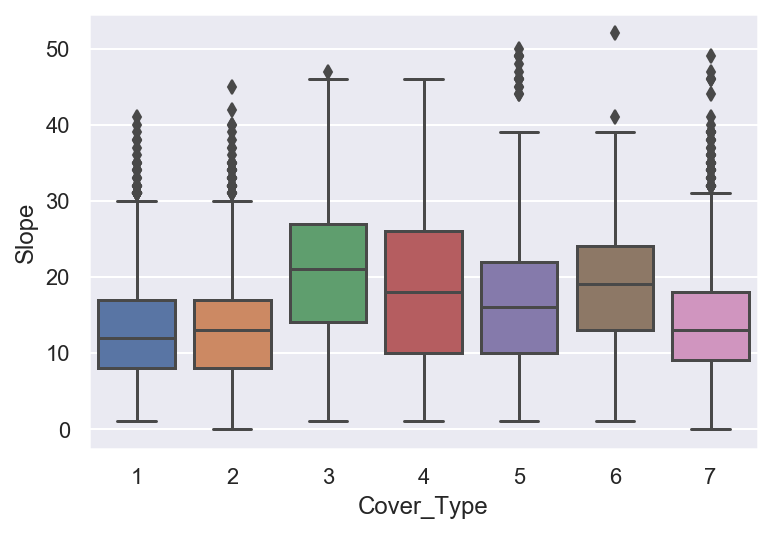

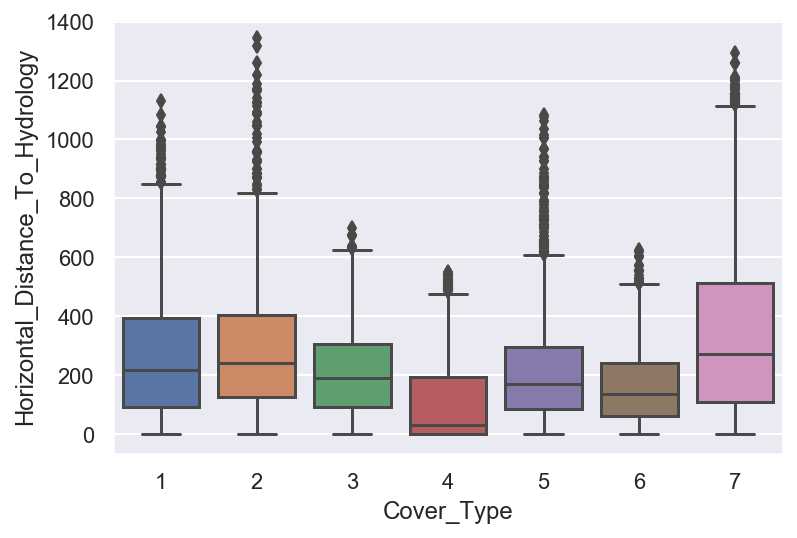

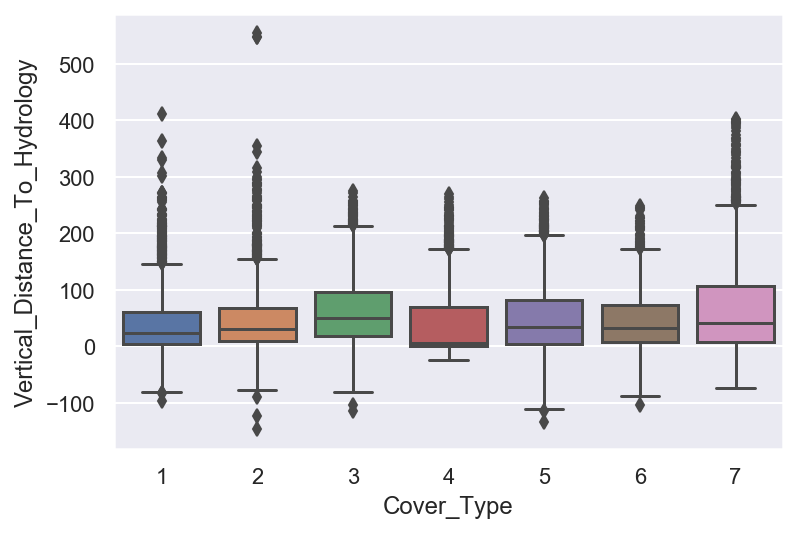

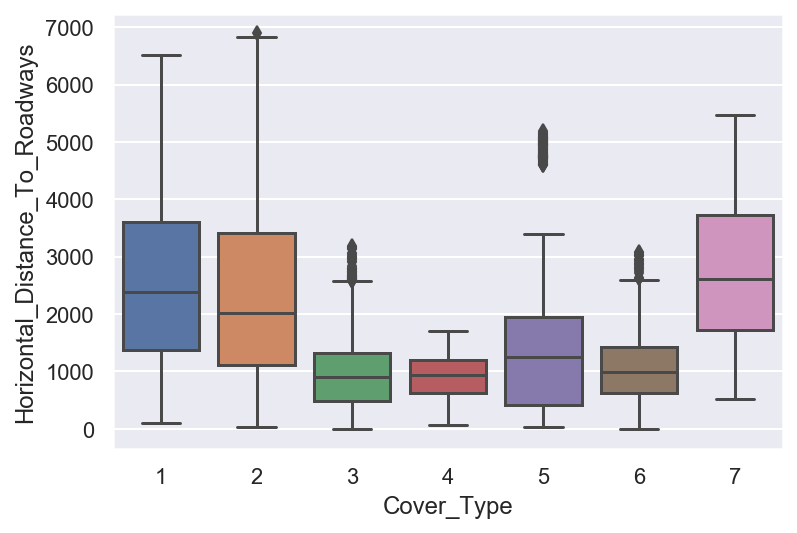

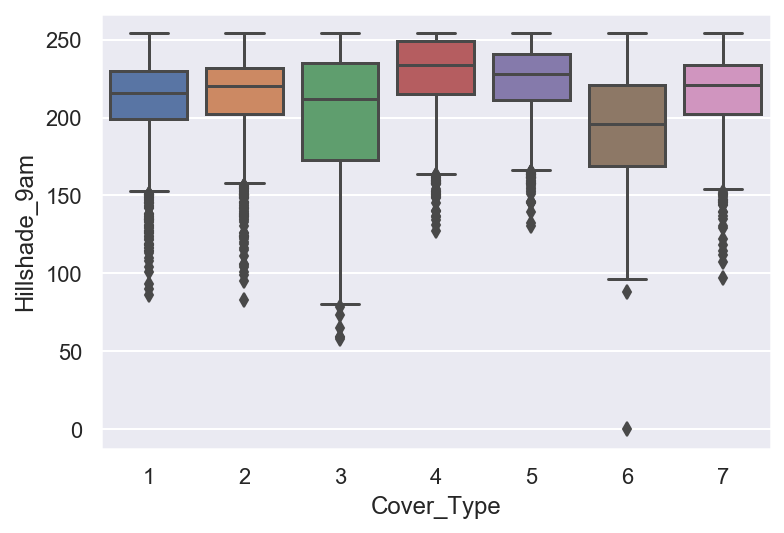

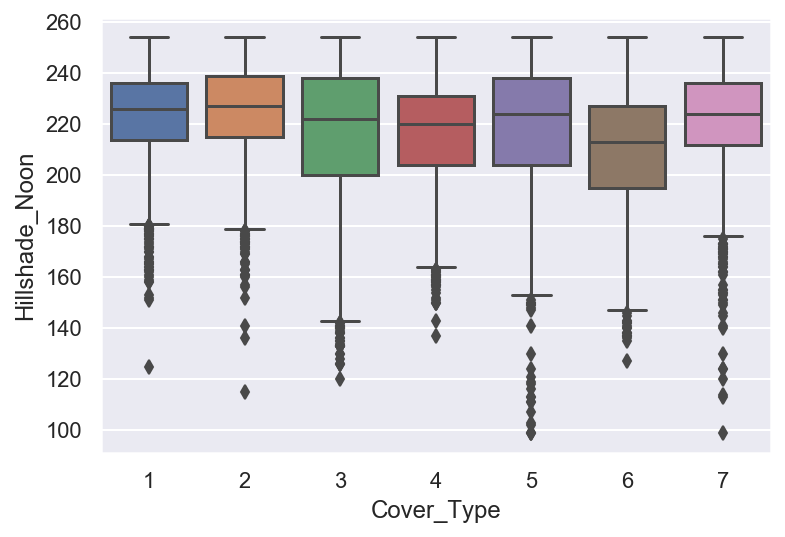

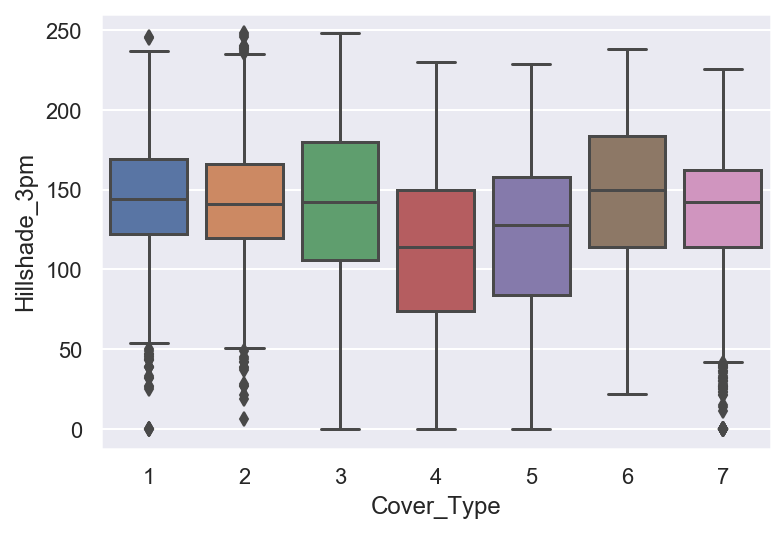

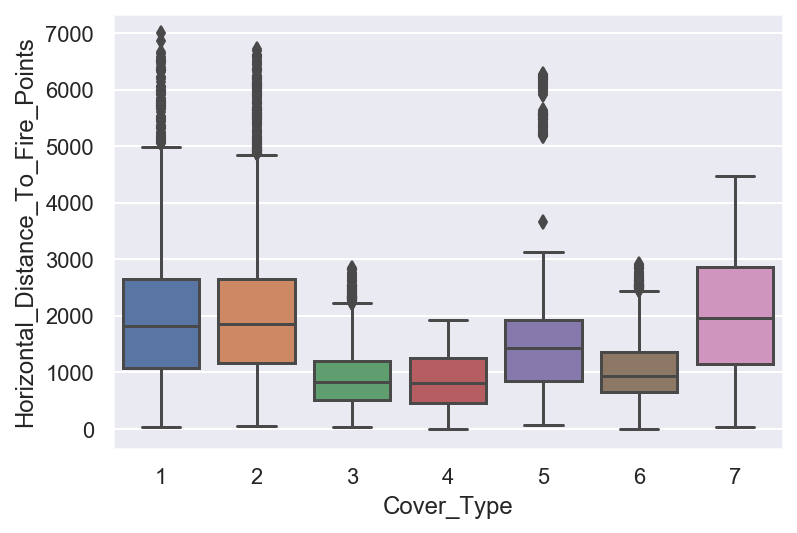

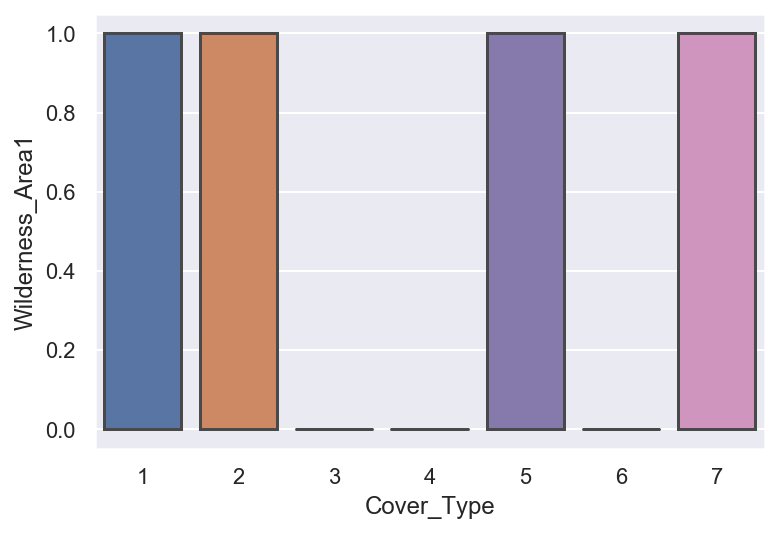

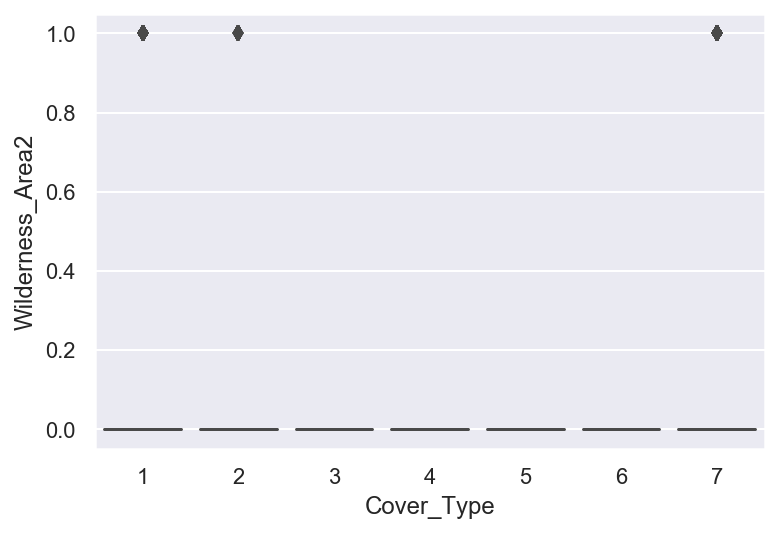

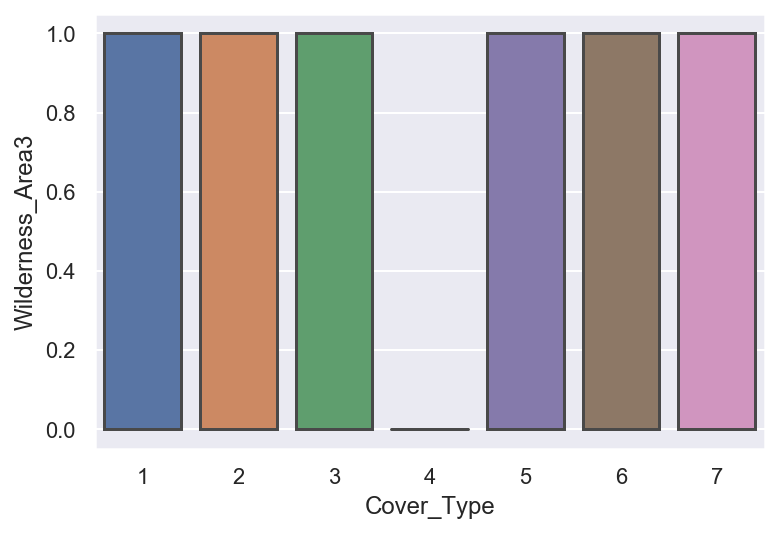

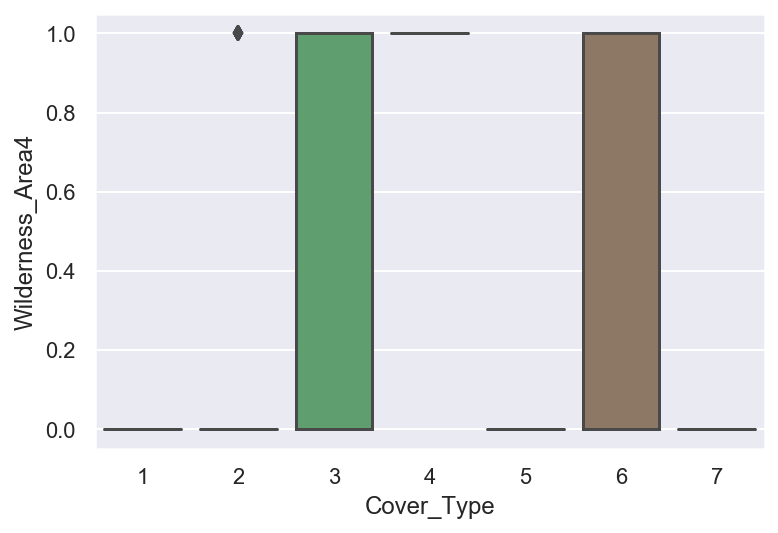

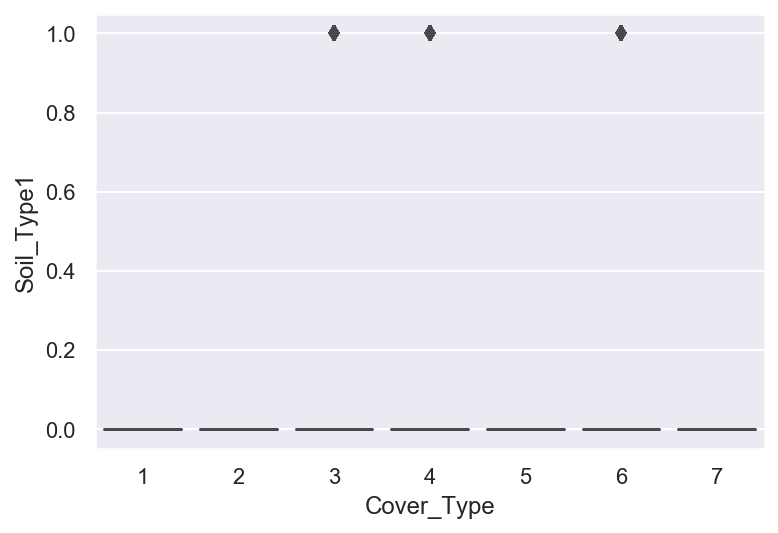

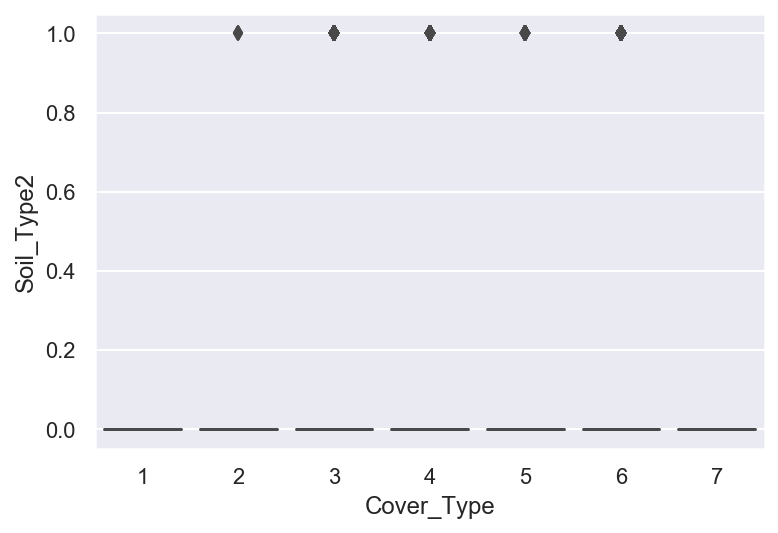

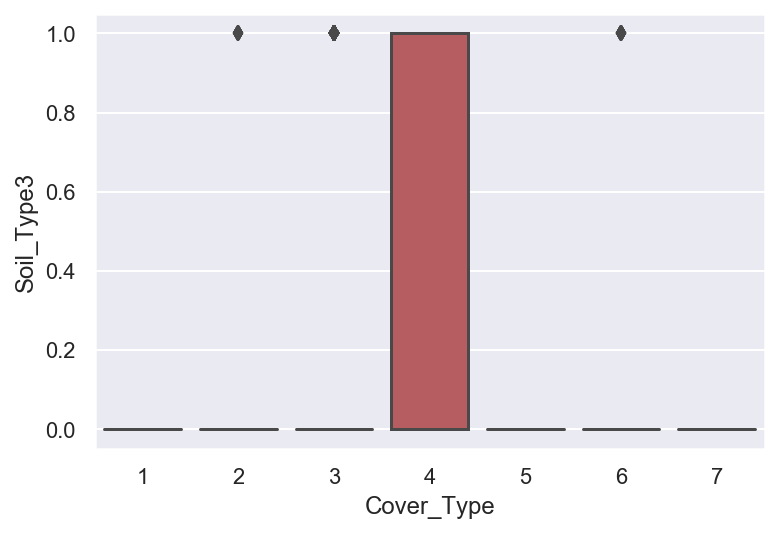

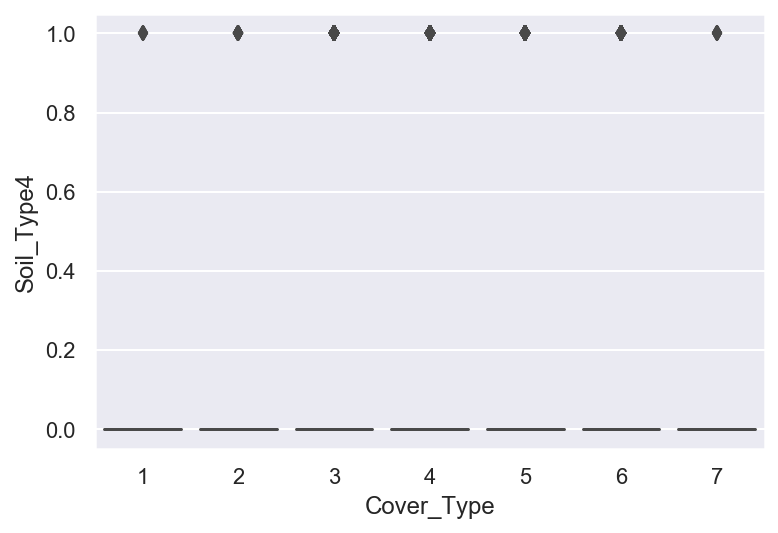

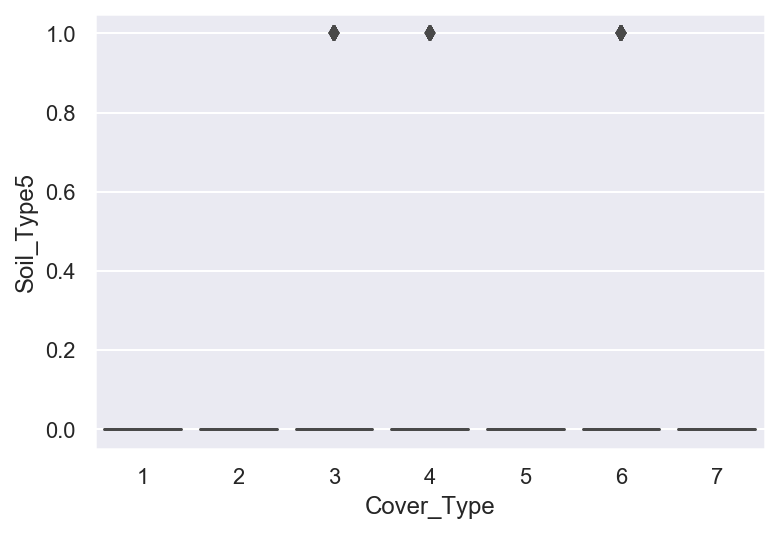

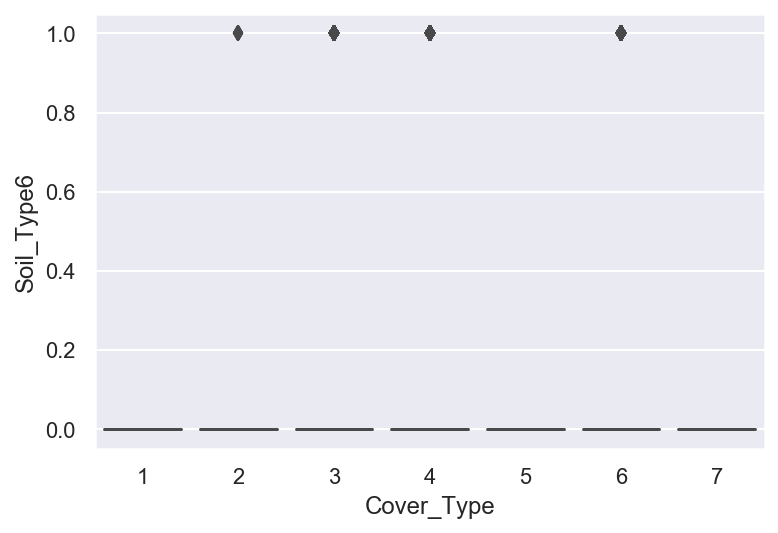

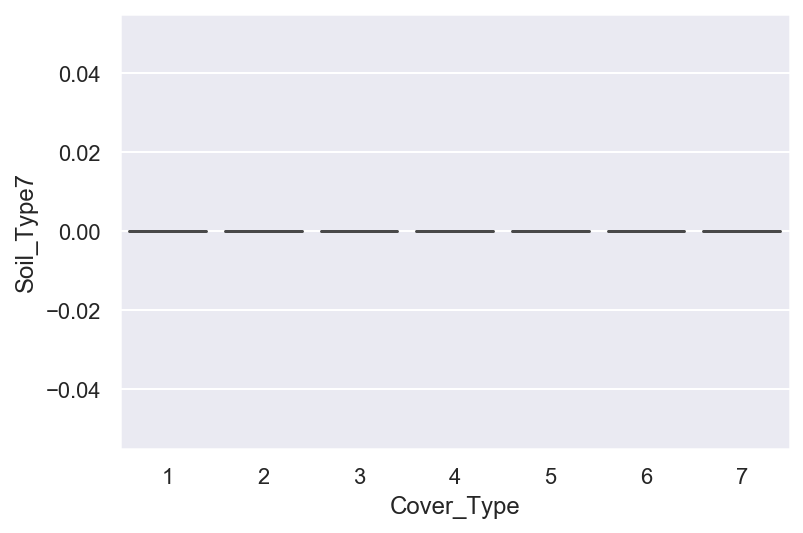

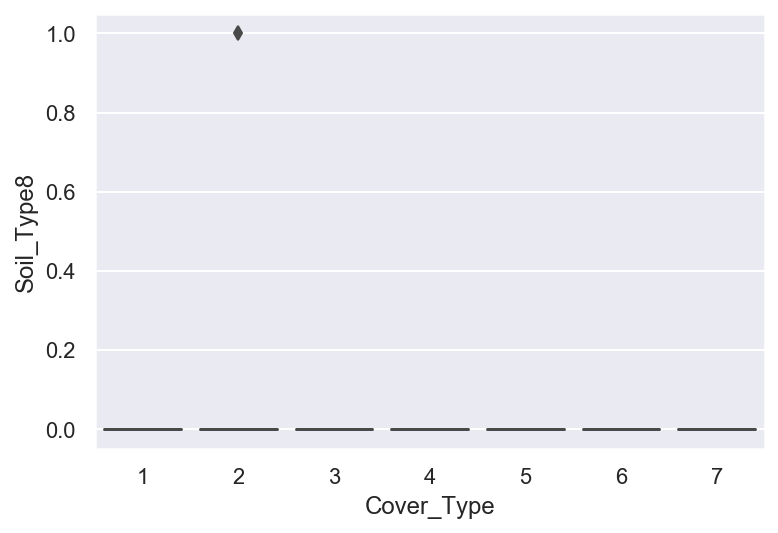

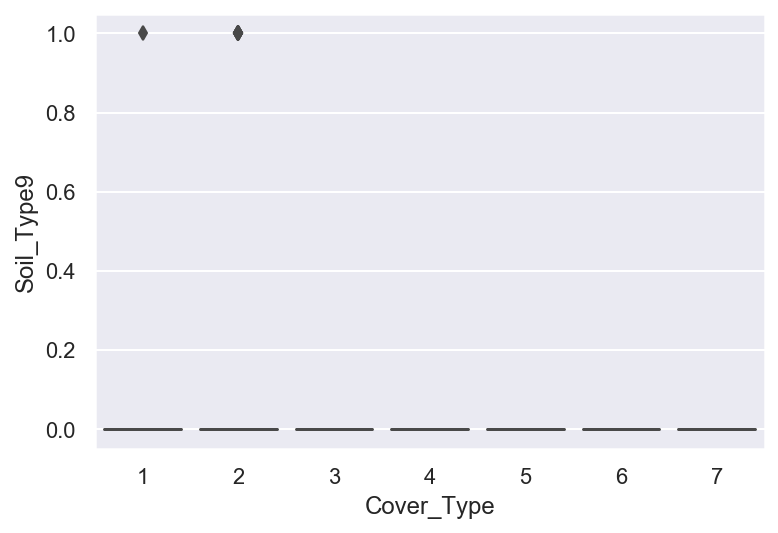

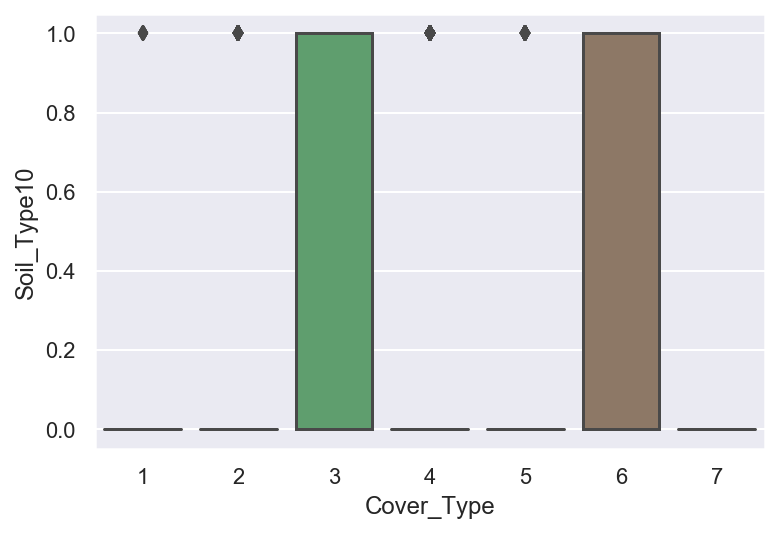

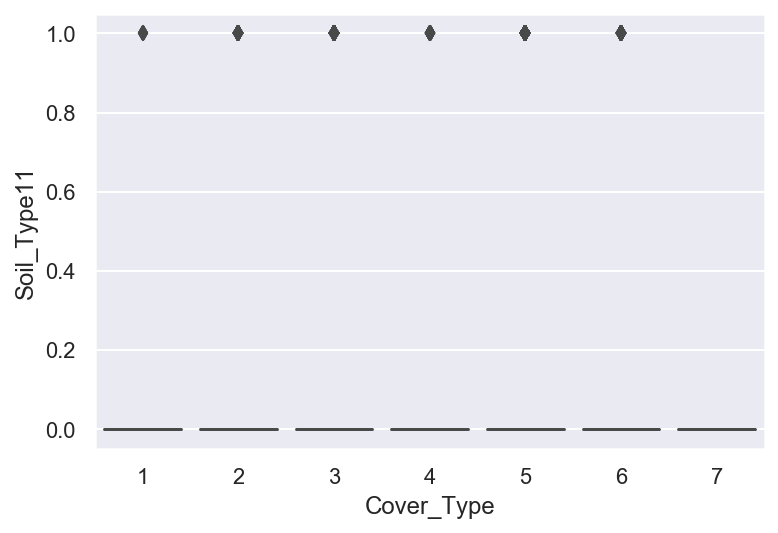

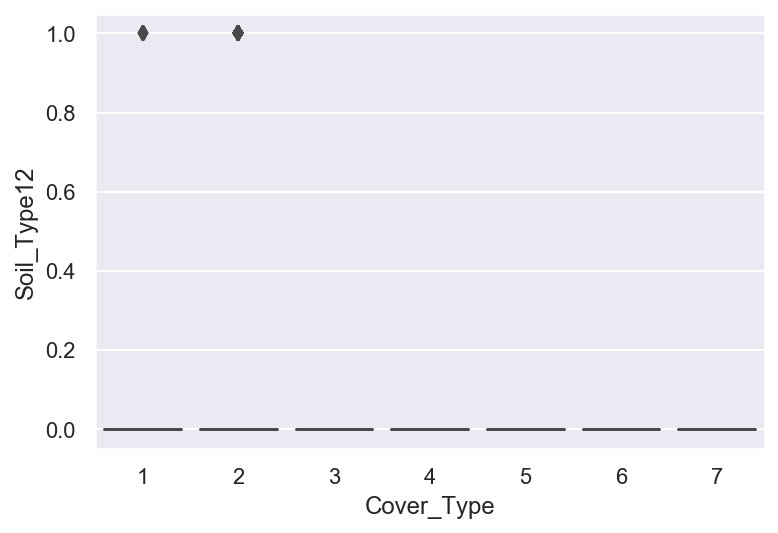

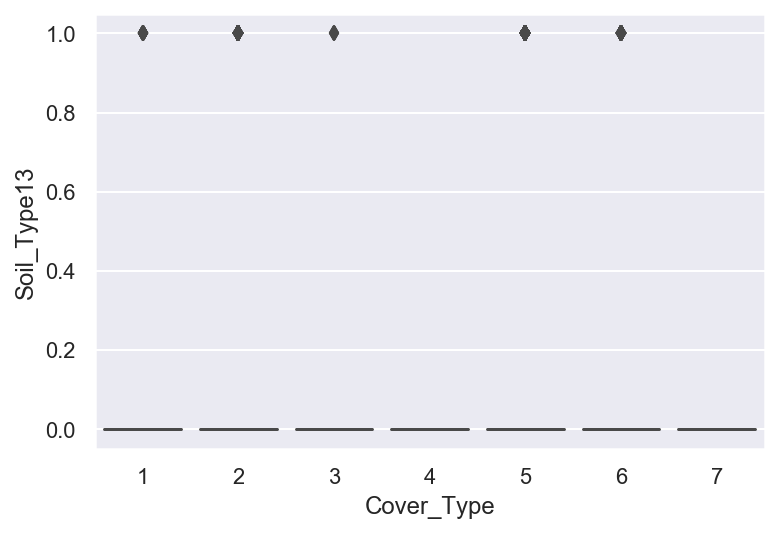

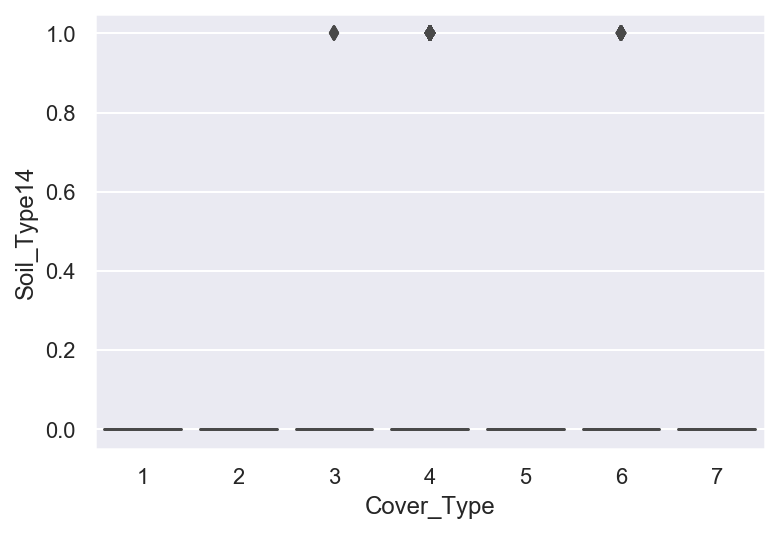

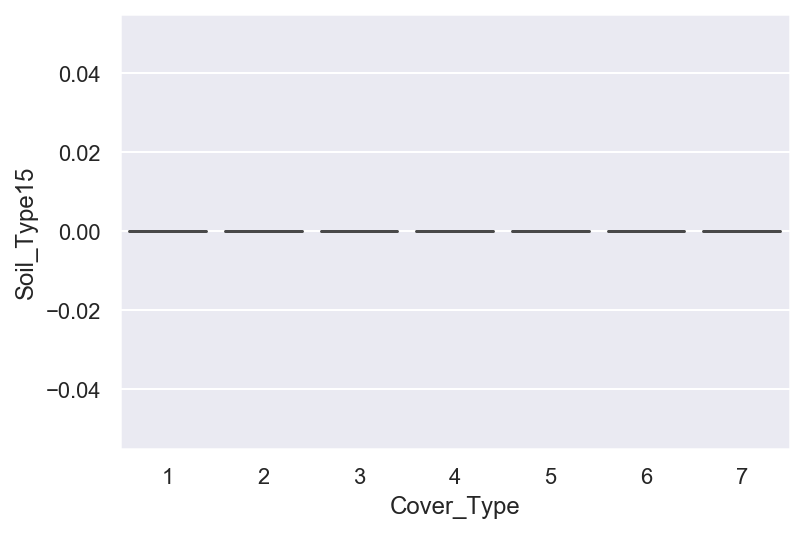

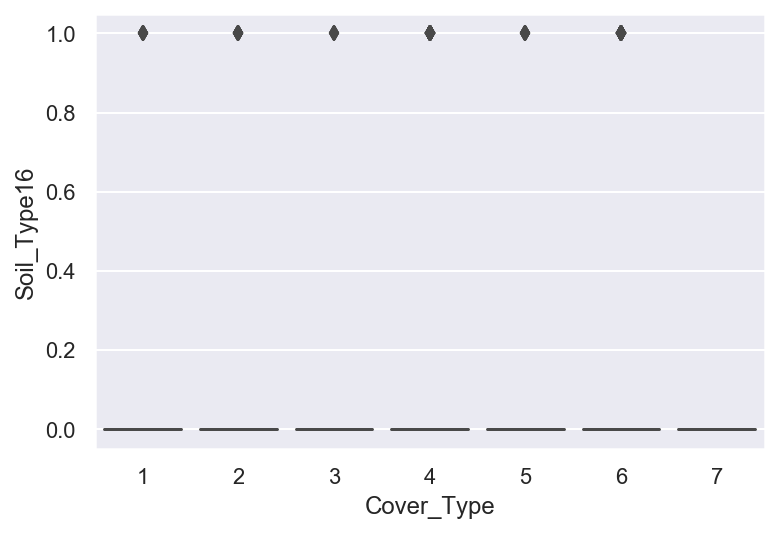

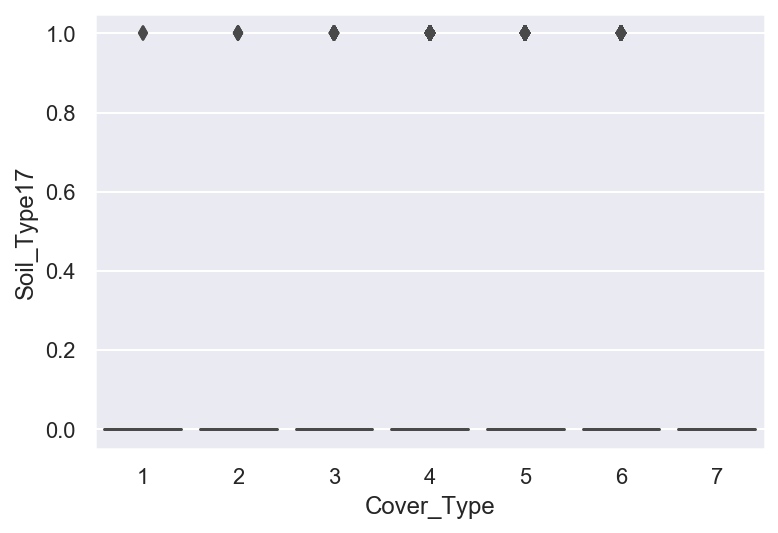

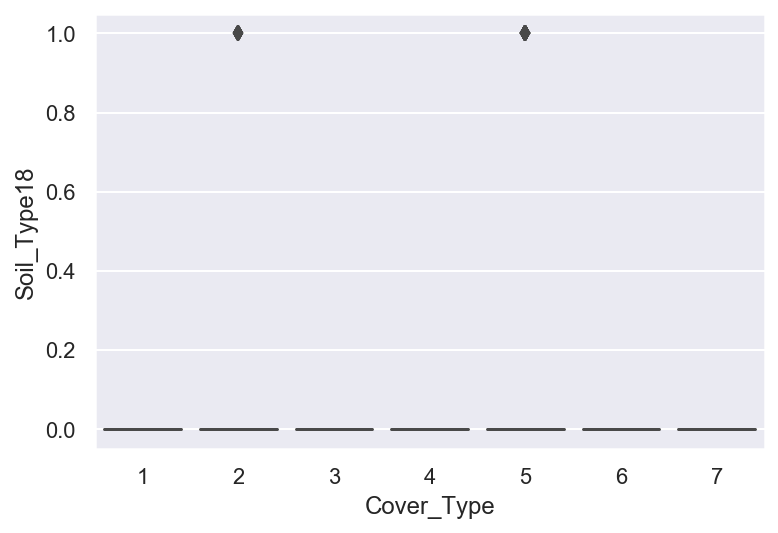

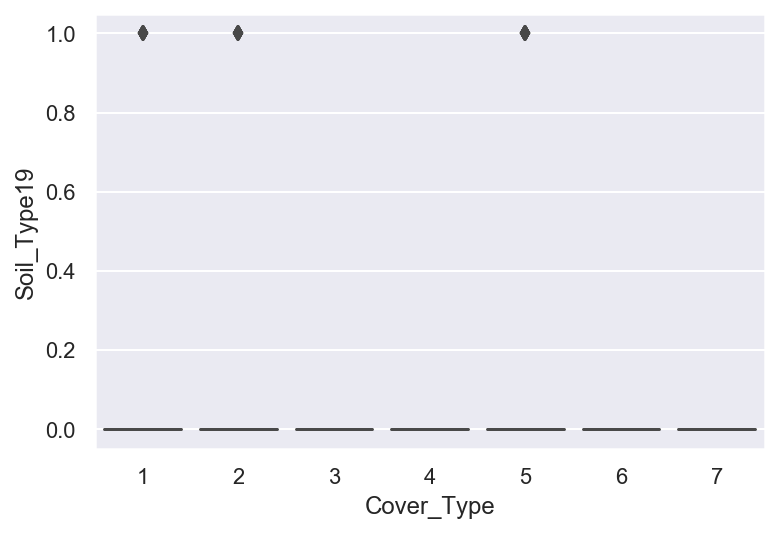

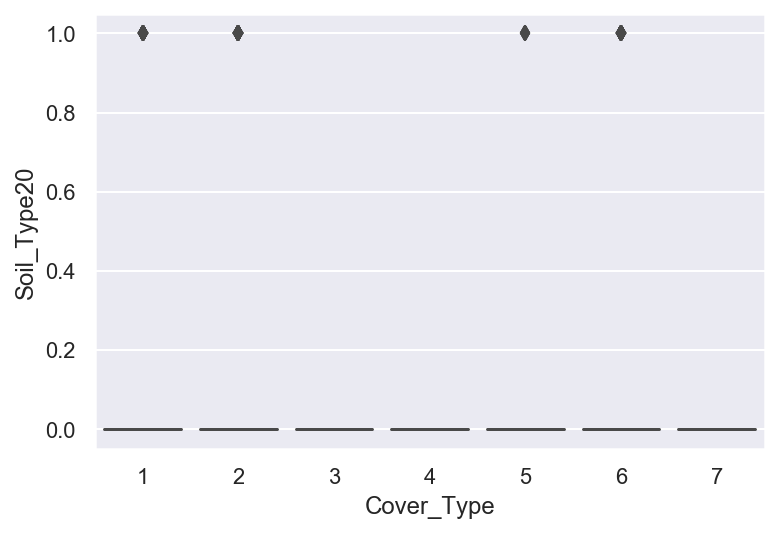

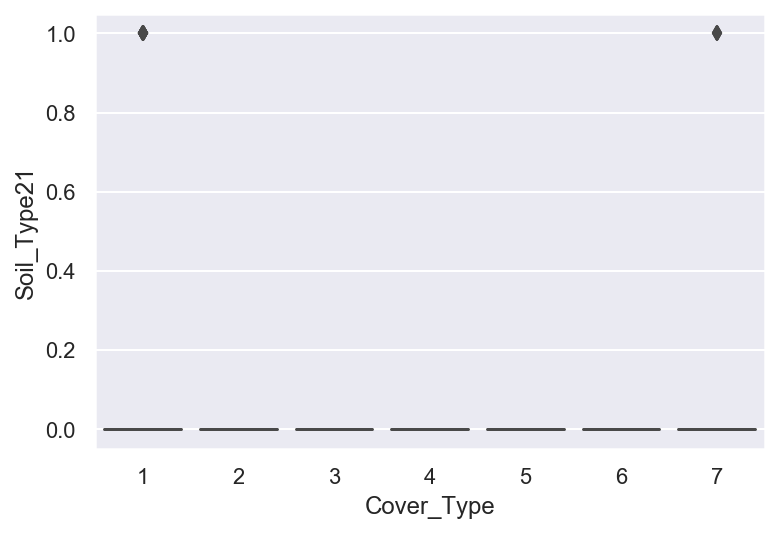

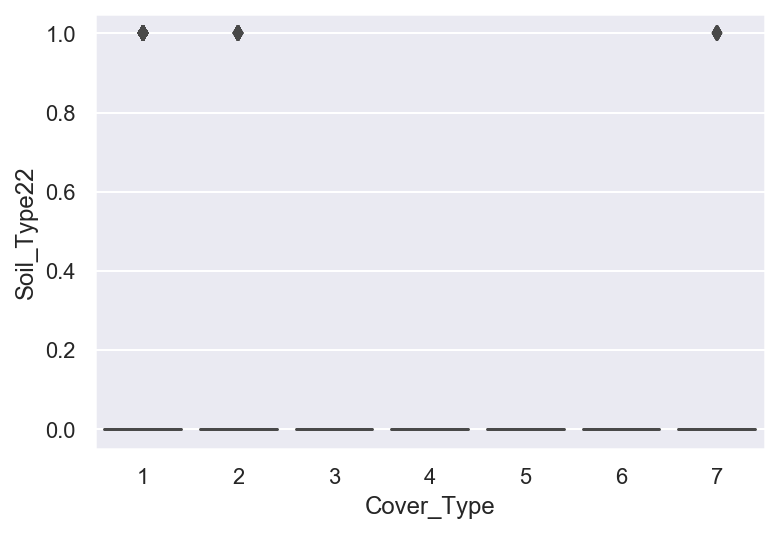

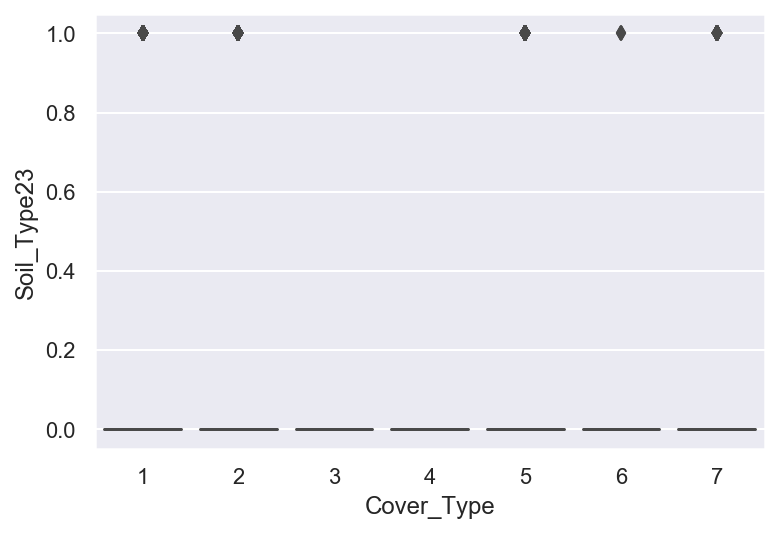

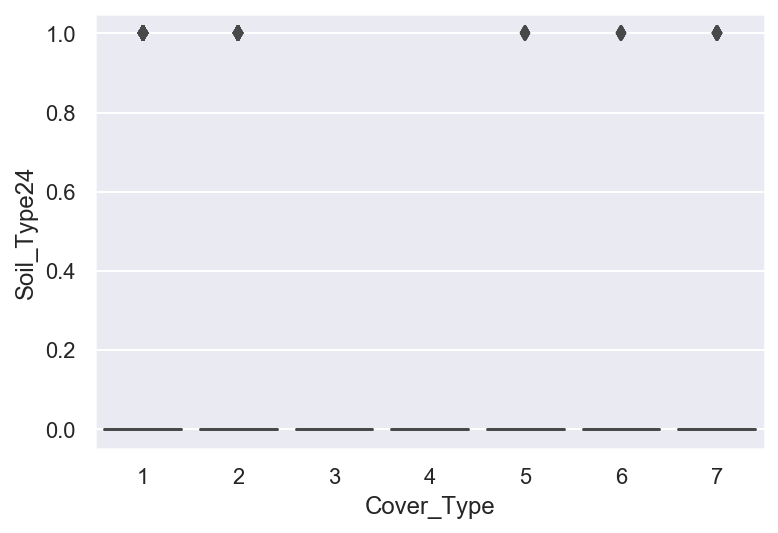

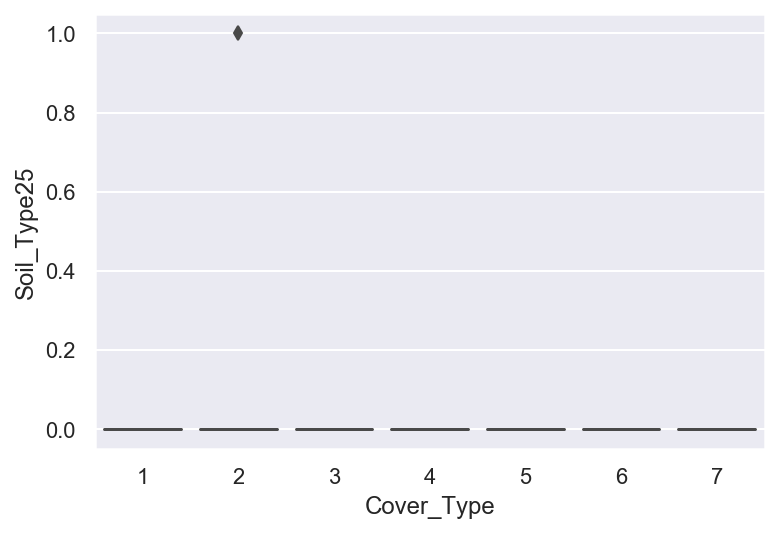

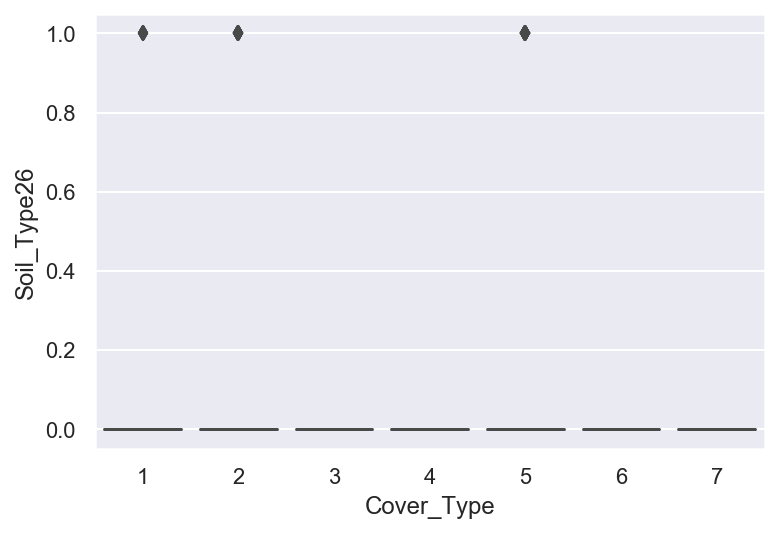

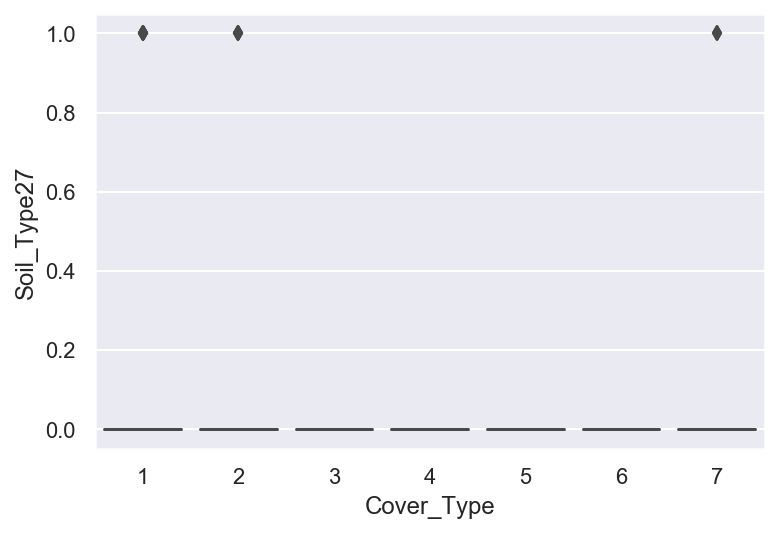

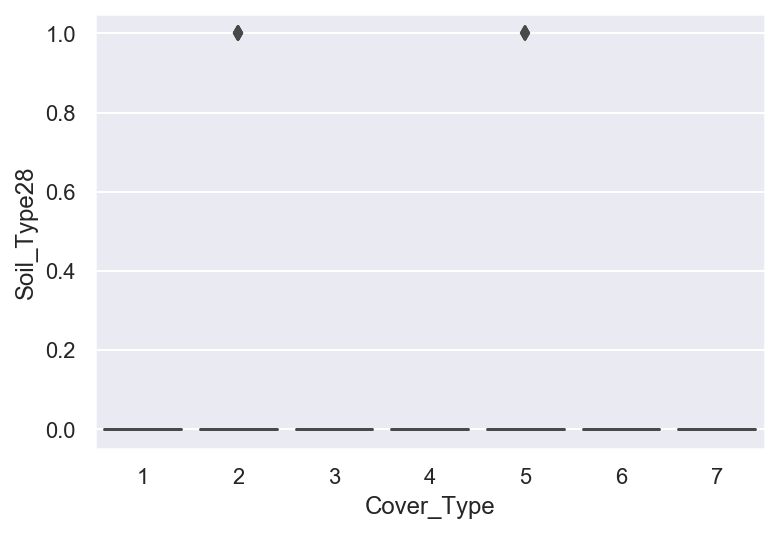

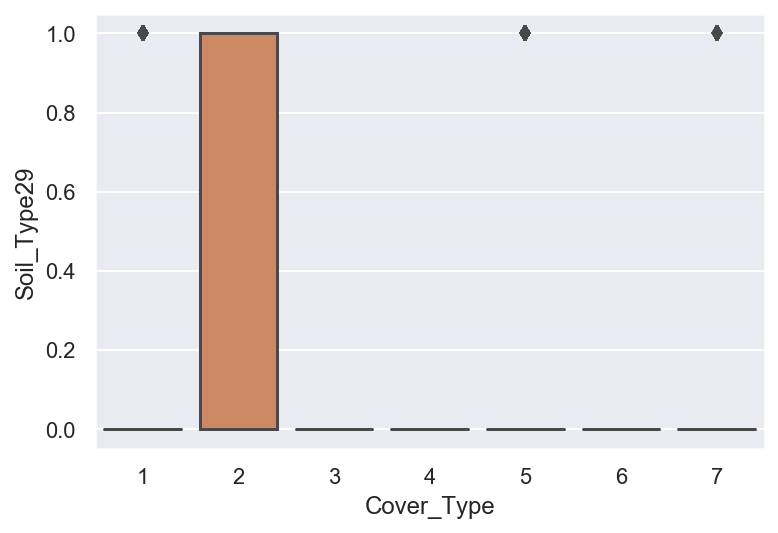

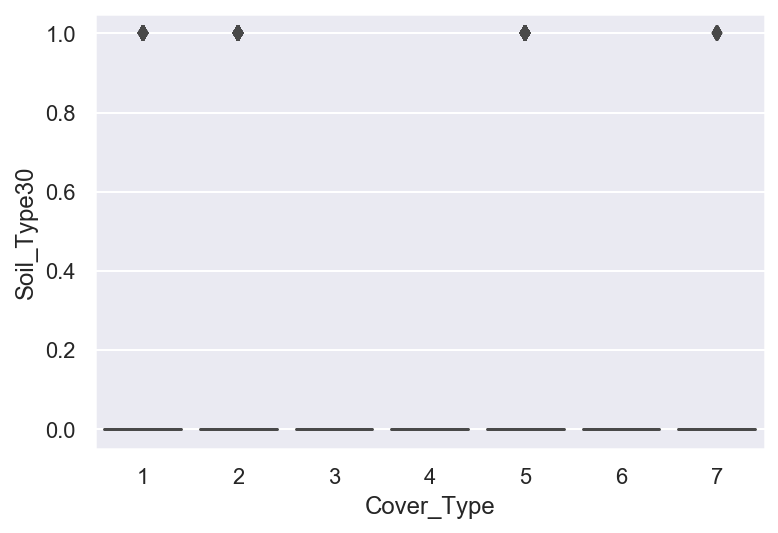

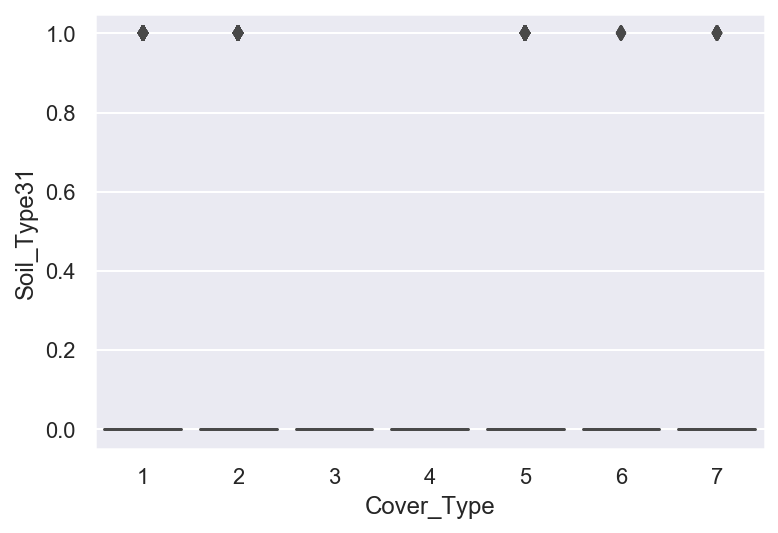

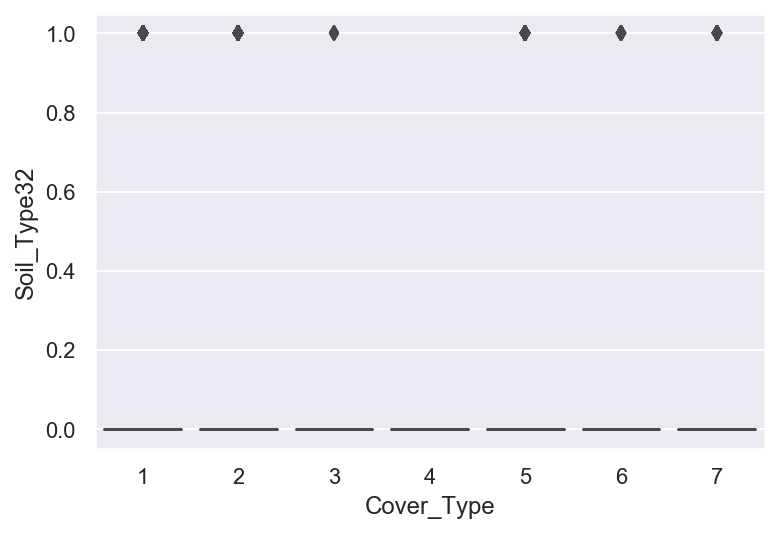

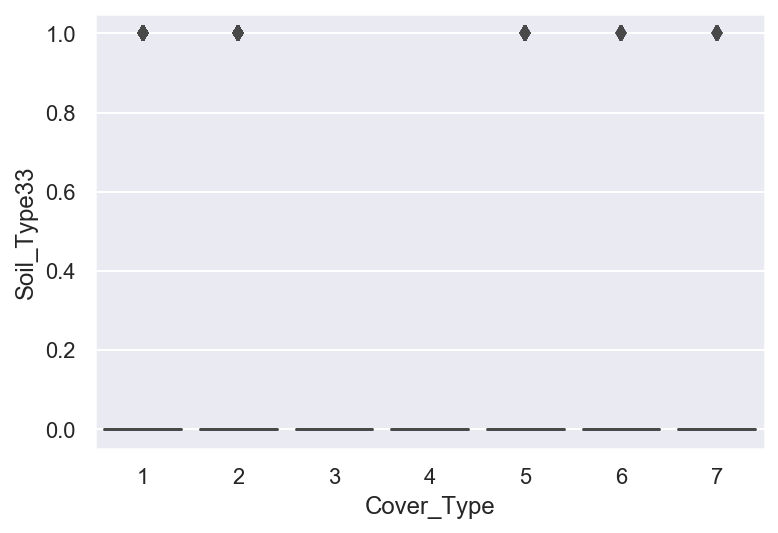

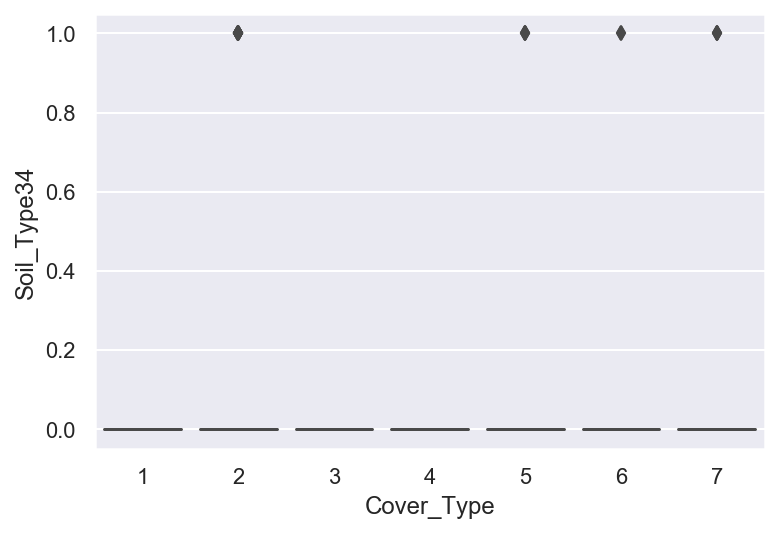

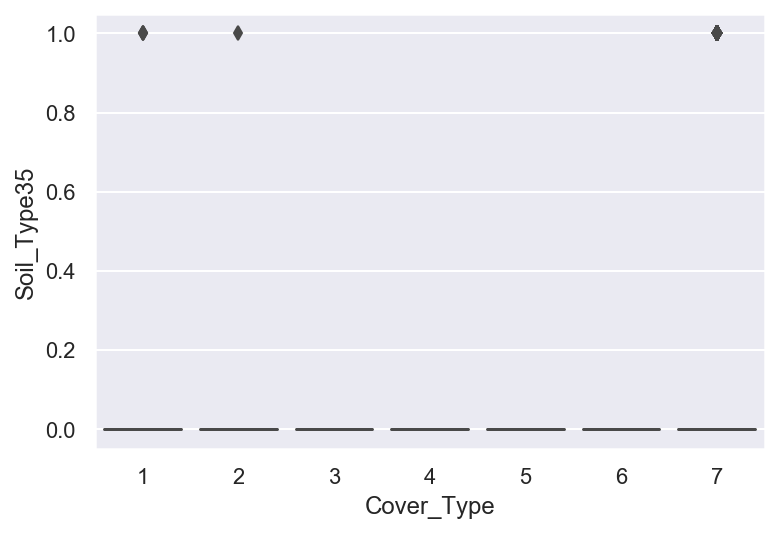

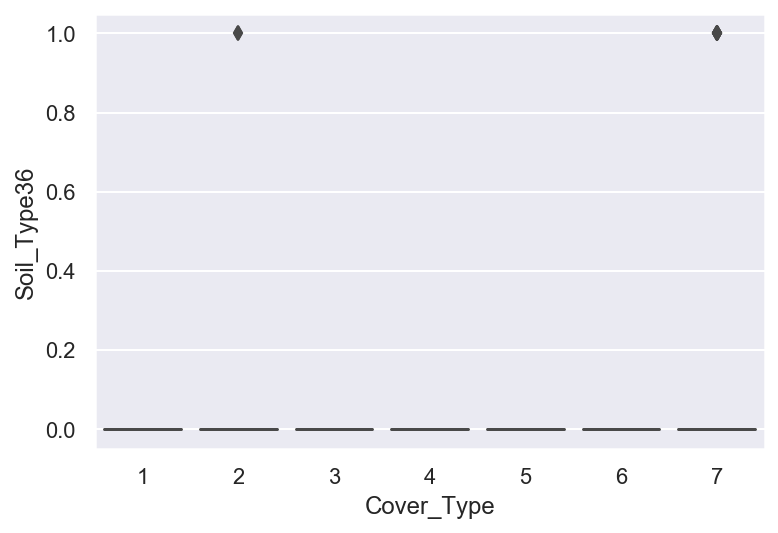

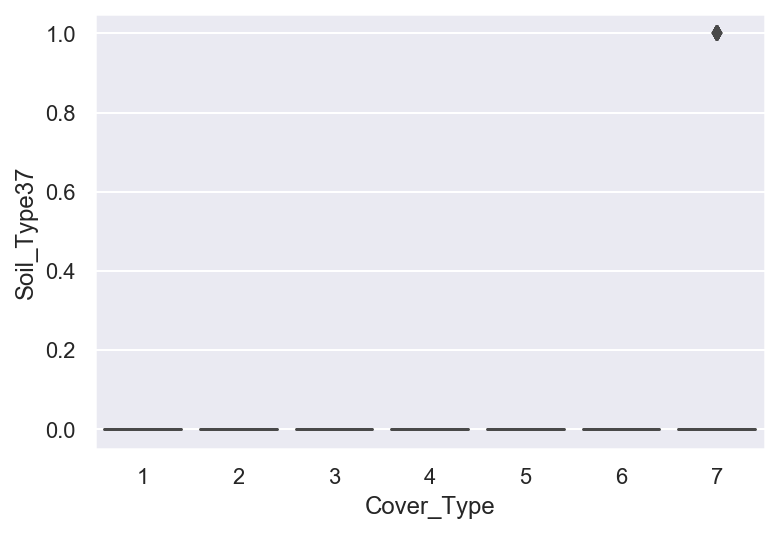

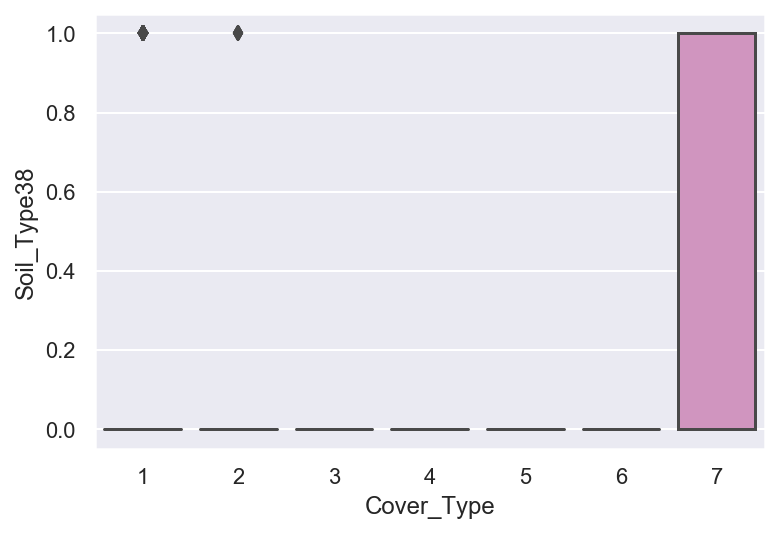

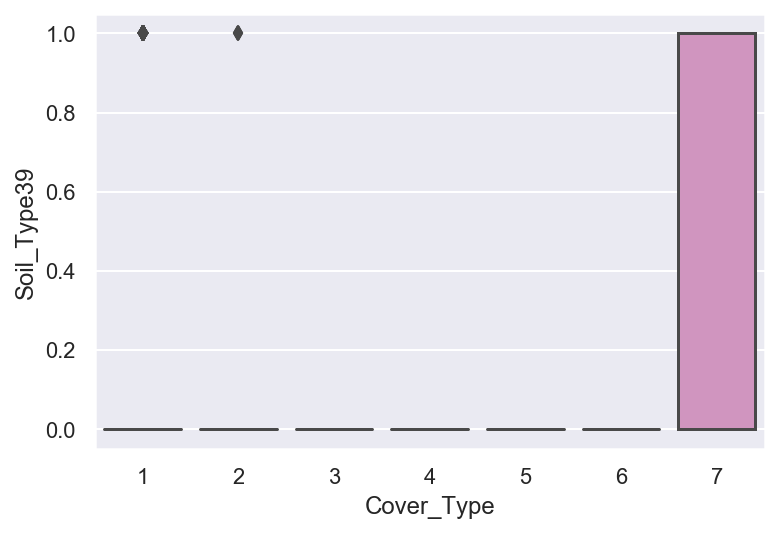

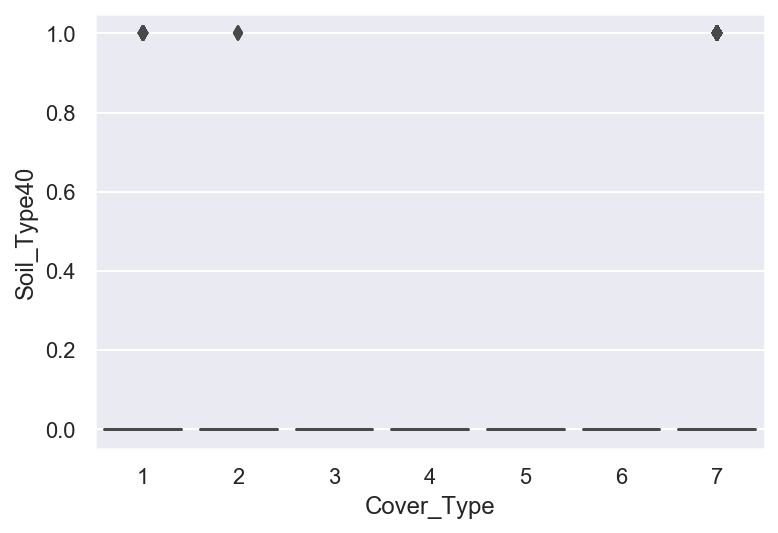

In [118]:
for idx, val in enumerate(df_train.columns[:-1].tolist()):
    sns.boxplot(x="Cover_Type", y=val, data=df_train)
    plt.show()

In [44]:
df_train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

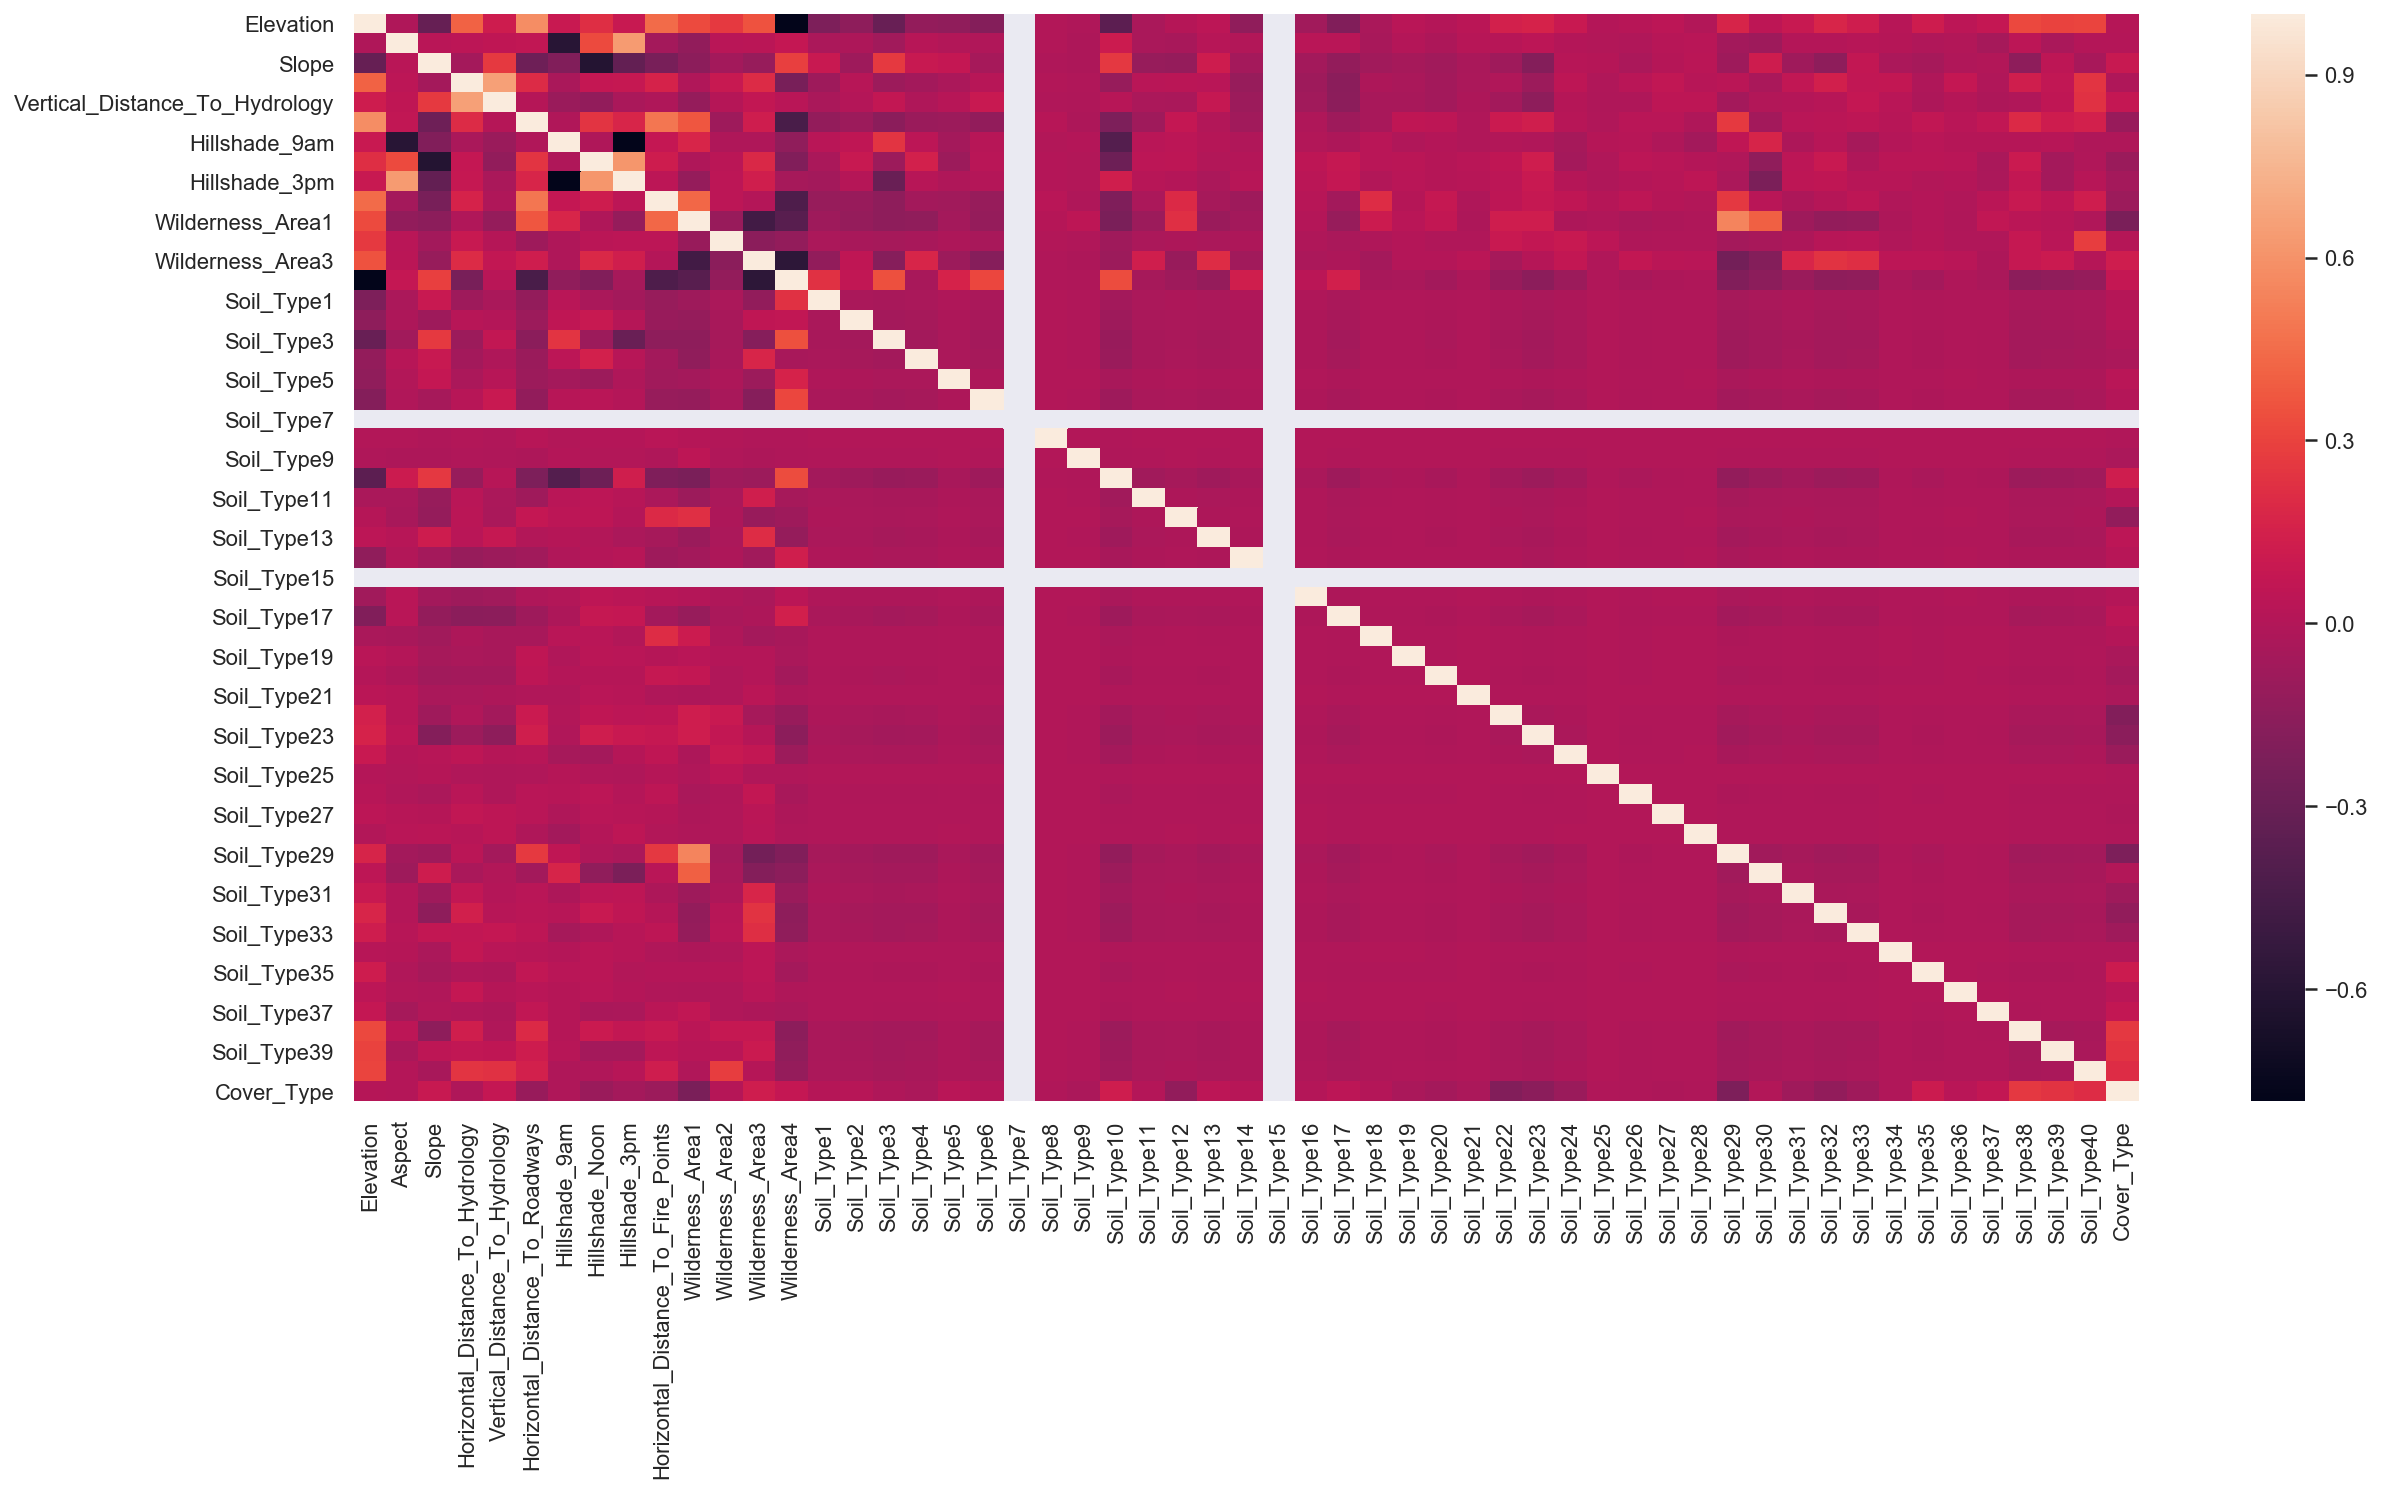

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(df_train.corr())

Parece que hay algo raro en las variables Soil_Type7 y 15 ya que no existe correlación con ninguno, esto es debido a que sólo presenta un valor, el cual es 0, mientras que para el resto de variables de Soil_Type, presenta ambos valores booleanos.

In [37]:
df_train['Soil_Type7'].unique()

array([0], dtype=int64)

Aún así creo que para el análisis de la correlación no tiene mucho sentido o no aporta demasiado las variables del tipo Soil, sería interesante hacer la prueba sin ellas

### Modelos de clasificación básicos

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df_train.drop(columns='Cover_Type')
y = df_train['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10)

#### Logistic regresion

Accuracy train: 0.47316704459561604

Accuracy test: 0.48412698412698413
              precision    recall  f1-score   support

           1       0.44      0.41      0.43       657
           2       0.44      0.42      0.43       630
           3       0.38      0.41      0.40       602
           4       0.71      0.74      0.72       686
           5       0.44      0.47      0.46       646
           6       0.30      0.23      0.26       657
           7       0.60      0.68      0.64       658

    accuracy                           0.48      4536
   macro avg       0.47      0.48      0.47      4536
weighted avg       0.47      0.48      0.48      4536

Numero de clasificaciones: 4536


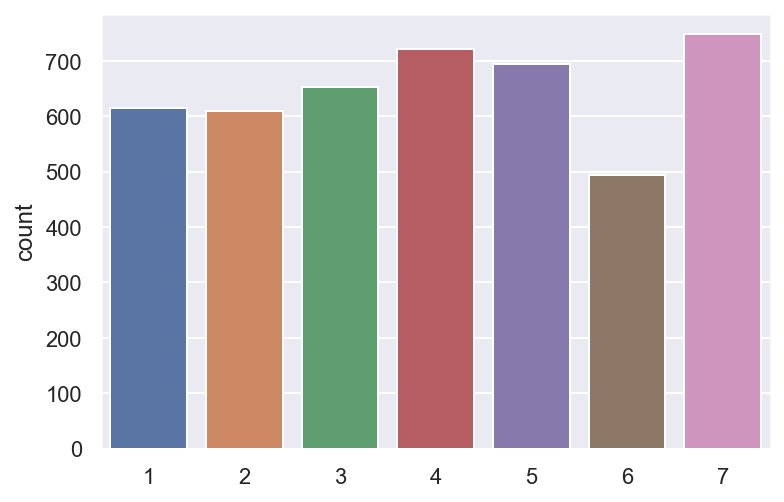

In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train_lr)))
print('')
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_lr)))
print(metrics.classification_report(y_test, y_pred_lr))

print('Numero de clasificaciones: {}'.format(len(y_pred_lr)))
sns.countplot(y_pred_lr);

#### Decision tree

Accuracy train: 1.0

Accuracy test: 0.7777777777777778
              precision    recall  f1-score   support

           1       0.67      0.64      0.65       657
           2       0.59      0.61      0.60       630
           3       0.73      0.73      0.73       602
           4       0.91      0.92      0.92       686
           5       0.85      0.88      0.86       646
           6       0.78      0.74      0.76       657
           7       0.89      0.91      0.90       658

    accuracy                           0.78      4536
   macro avg       0.78      0.78      0.78      4536
weighted avg       0.78      0.78      0.78      4536

Profundidad del árbol 29
Numero de clasificaciones: 4536


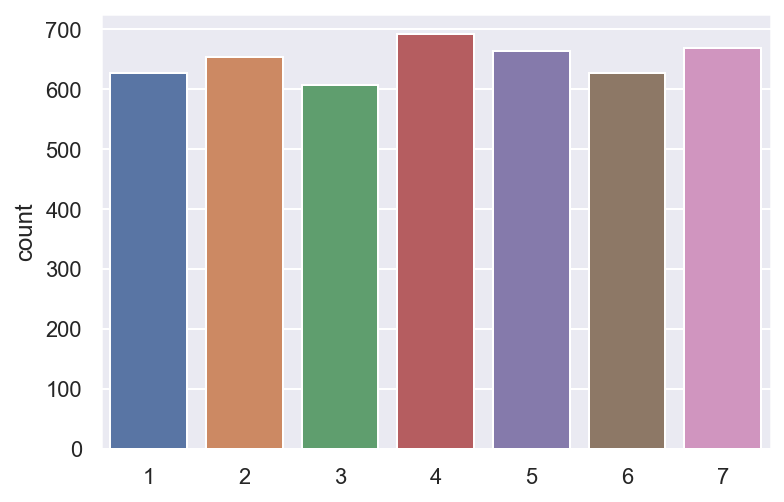

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=10) #No es bueno djar ramificar hasta el límite ya que sobreajustamos al máximo al conjunto de train
dtc.fit(X_train, y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_dtc = dtc.predict(X_test)

print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train_dtc)))
print('')
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_dtc)))
print(metrics.classification_report(y_test, y_pred_dtc))

print('Profundidad del árbol {}'.format(dtc.get_depth()))
print('Numero de clasificaciones: {}'.format(len(y_pred_dtc)))
sns.countplot(y_pred_dtc);

#### Perceptron

Accuracy train: 0.28221844293272863

Accuracy test: 0.27557319223985893
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       657
           2       0.57      0.08      0.14       630
           3       0.22      0.72      0.33       602
           4       0.88      0.11      0.19       686
           5       0.00      0.00      0.00       646
           6       0.18      0.47      0.26       657
           7       0.60      0.59      0.60       658

    accuracy                           0.28      4536
   macro avg       0.35      0.28      0.22      4536
weighted avg       0.35      0.28      0.22      4536

Numero de clasificaciones: 4536


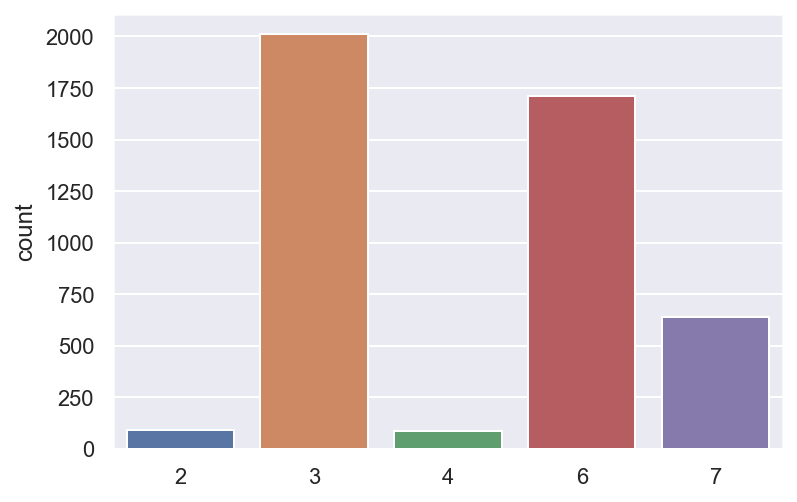

In [17]:
from sklearn.linear_model import Perceptron

p = Perceptron(random_state=10) #Es necesario estudiarlo más para definir paramteros ya que este no vale por defecto
p.fit(X_train, y_train)
y_pred_train_p = p.predict(X_train)
y_pred_p = p.predict(X_test)

print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train_p)))
print('')
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_p)))
print(metrics.classification_report(y_test, y_pred_p))

print('Numero de clasificaciones: {}'.format(len(y_pred_p)))
sns.countplot(y_pred_p);

#### RandomForest

              precision    recall  f1-score   support

           1       0.82      0.77      0.80       657
           2       0.77      0.71      0.74       630
           3       0.82      0.81      0.82       602
           4       0.92      0.97      0.95       686
           5       0.90      0.94      0.92       646
           6       0.85      0.85      0.85       657
           7       0.94      0.97      0.96       658

    accuracy                           0.86      4536
   macro avg       0.86      0.86      0.86      4536
weighted avg       0.86      0.86      0.86      4536

Accuracy train: 1.0
Accuracy test: 0.8637566137566137
Profundidad 30
Numero de clasificaciones: 4536


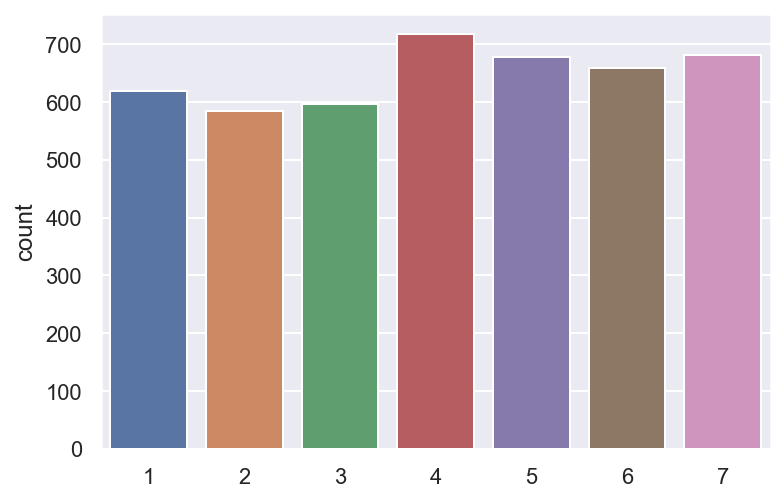

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=10, max_depth=30, n_estimators=100)
rfc.fit(X_train, y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred = rfc.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train_rfc)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Profundidad {}'.format(rfc[0].get_depth()))
print('Numero de clasificaciones: {}'.format(len(y_pred)))
sns.countplot(y_pred);

---

## Modelos con GridSearch

#### Regresion logística

In [22]:
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression(random_state=10)
# Parametros optimos obtenidos de ejecutar todos, pero no es necesario volver a probar todos, sólo el mejor
parameters = {
                'penalty': ['l2'], 
                'tol': [0.00001],
                'solver': ['newton-cg'],
                'max_iter': [500],
                'C': [2]
             }

GS = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, refit=True, verbose=1)
GS.fit(X_train, y_train)

print('El mejor conjunto de parametros es: {}'.format(GS.best_params_))
estimator = GS.best_estimator_
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.4min finished


El mejor conjunto de parametros es: {'C': 2, 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 1e-05}
Accuracy train: 0.6976568405139834
Accuracy test: 0.705026455026455


#### KNeighbours

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

parameters = {
                'n_neighbors': [2, 5, 10, 20, 30], 
                'weights': ['uniform', 'distance'],
                'p': [1, 2],
             }

GS = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, refit=True, verbose=1)
GS.fit(X_train, y_train)

print('El mejor conjunto de parametros es: {}'.format(GS.best_params_))
estimator = GS.best_estimator_
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.2s finished


El mejor conjunto de parametros es: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
Accuracy train: 1.0
Accuracy test: 0.841931216931217


#### SVM

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

clf = svm.LinearSVC(random_state=10, verbose=1)

parameters = {
                'penalty': ['l2'], 
                'tol': [0.00001],
                'C': [1],
                'multi_class': ['ovr']
             }

GS = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, refit=True, verbose=1)
GS.fit(X_train, y_train)

print('El mejor conjunto de parametros es: {}'.format(GS.best_params_))
estimator = GS.best_estimator_
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished


[LibLinear]El mejor conjunto de parametros es: {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'tol': 1e-05}
Accuracy train: 0.5033068783068783
Accuracy test: 0.5092592592592593


### Decision tree

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)

parameters = {
                'max_depth': [None, 2, 5, 10, 15], 
                'class_weight': [None, 'balanced'],
             }

GS = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, refit=True, verbose=1)
GS.fit(X_train, y_train)

print('El mejor conjunto de parametros es: {}'.format(GS.best_params_))
estimator = GS.best_estimator_
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


El mejor conjunto de parametros es: {'class_weight': 'balanced', 'max_depth': 15}
Accuracy train: 0.9599395313681028
Accuracy test: 0.783068783068783


---

## Ensembles

In [10]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=2, p=1, weights='distance'))
bagging.fit(X_train, y_train)

y_pred_train = bagging.predict(X_train)
y_pred_test = bagging.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy train: 0.9888510959939532
Accuracy test: 0.8309082892416225


### AdaBoost

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

# Ejcutamos adaboost con el mejor modelo obtenido tras entrenar los arboles de decision con el grid search y obtener los mejores parámetros
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10, class_weight='balanced', max_depth=15) ,n_estimators=200)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Accuracy train: 1.0
Accuracy test: 0.8630952380952381


### GradientBoosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
# Probar con los diferentes vbalores e incluso seria interesante meter el gradientBoostingClasifier en un grid search probando con el n de estimadores, la profundidad y más parametros
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rate, max_depth=5, random_state=10)
    gb_clf.fit(X_train, y_train)

    print("### Learning rate: ", learning_rate)
    y_pred_train = gb_clf.predict(X_train)
    y_pred_test = gb_clf.predict(X_test)
    print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
    print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))
    print('')


### Learning rate:  0.05
Accuracy train: 0.8968253968253969
Accuracy test: 0.824294532627866

### Learning rate:  0.075
Accuracy train: 0.9301776266061981
Accuracy test: 0.8373015873015873

### Learning rate:  0.1
Accuracy train: 0.9529478458049887
Accuracy test: 0.8421516754850088

### Learning rate:  0.25
Accuracy train: 0.9983938019652305
Accuracy test: 0.847663139329806

### Learning rate:  0.5
Accuracy train: 1.0
Accuracy test: 0.847663139329806

### Learning rate:  0.75
Accuracy train: 1.0
Accuracy test: 0.8414902998236331

### Learning rate:  1
Accuracy train: 0.9995275888133031
Accuracy test: 0.8258377425044092



## RandomForest con GridSearch

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=10)
# Esta configuración obtiene buenos resultados pero habría que estudiarlo ya que la profundidad no se le puede dejar que ramifique al máximo
parameters = {
                'n_estimators': [200],
                'max_depth': [None], 
                'class_weight': [None],
             }

GS = GridSearchCV(clf, parameters, cv=5, n_jobs=-1, refit=True, verbose=1)
GS.fit(X_train, y_train)

print('El mejor conjunto de parametros es: {}'.format(GS.best_params_))
estimator = GS.best_estimator_
y_pred_train = estimator.predict(X_train)
y_pred_test = estimator.predict(X_test)
print('Accuracy train: {}'.format(metrics.accuracy_score(y_train, y_pred_train)))
print('Accuracy test: {}'.format(metrics.accuracy_score(y_test, y_pred_test)))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    8.6s finished


El mejor conjunto de parametros es: {'class_weight': None, 'max_depth': None, 'n_estimators': 200}
Accuracy train: 1.0
Accuracy test: 0.8650793650793651
